<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint as pp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
with open('./Datasets/sat_scores.csv') as f:
    the_f = csv.reader(f)
    new_list = [row for row in the_f]

In [4]:
my_dict = {new_list[0][i]: [new_list[1:][n][i] for n in range(len(new_list[1:]))] for i in range(len(new_list[0]))}
my_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
pd.DataFrame(my_dict).dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [6]:
sat_df = pd.read_csv('./Datasets/sat_scores.csv')
sat_df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

* Converting the Python dictionary to a DataFrame will see all the data being read in as an object (or string), while using Pandas .read_csv() will read in the data as an object for the 'State' column but as an integer for the rest of the columns.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


* The data describes the SAT scores across all states in the USA and breaks them down into the Verbal anad Math scores as well as giving the pass rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

#### Data Dictionary for SAT Scores:
**State** - The state in the United States of America, marked by its two character shorthand name (e.g. CT = Connecticut)

**Rate** - The pass rate for total students a state in the USA for the SAT

**Verbal** - The average SAT score for Verbal subjects (language, english, etc.) 200-800 range

**Math** - Also known as 'Maths', the average SAT score for mathematical subjects (science, maths etc.)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

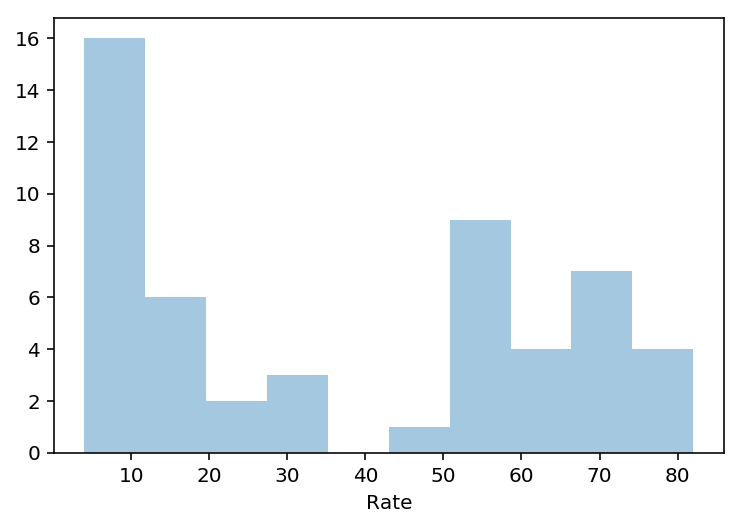

In [8]:
sns.distplot(sat_df['Rate'],kde=False,bins=10)

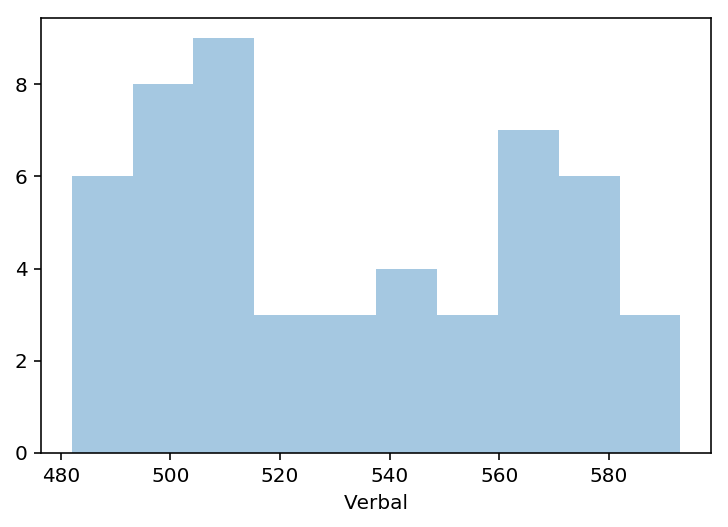

In [9]:
sns.distplot(sat_df['Verbal'],kde=False,bins=10)

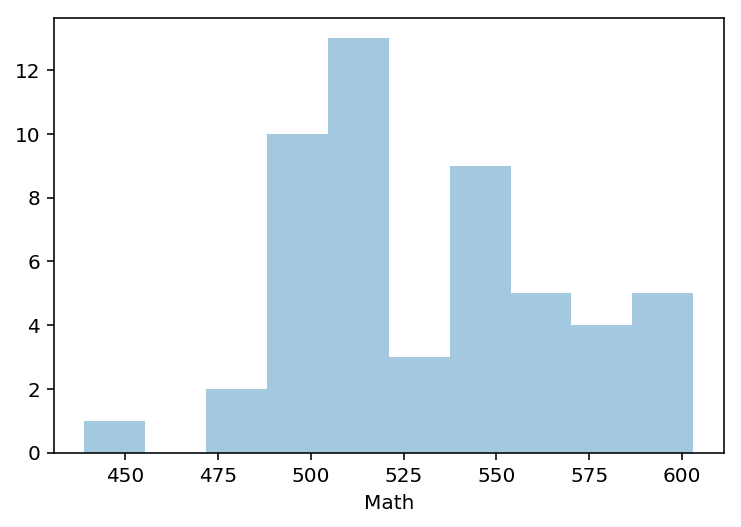

In [10]:
sns.distplot(sat_df['Math'],kde=False,bins=10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

* The visualisations tell us that there is a very clean positive and negative linear relationship between the variables. The strongest positive linear relationship exists between the Verbal and Math scores (as one increase so does the other proportionately). 


* A strong (but not as strong) negatively linear relationship exists between the rate and math/verbal scores (as the rate increases so too does the average Math and Verbal score).

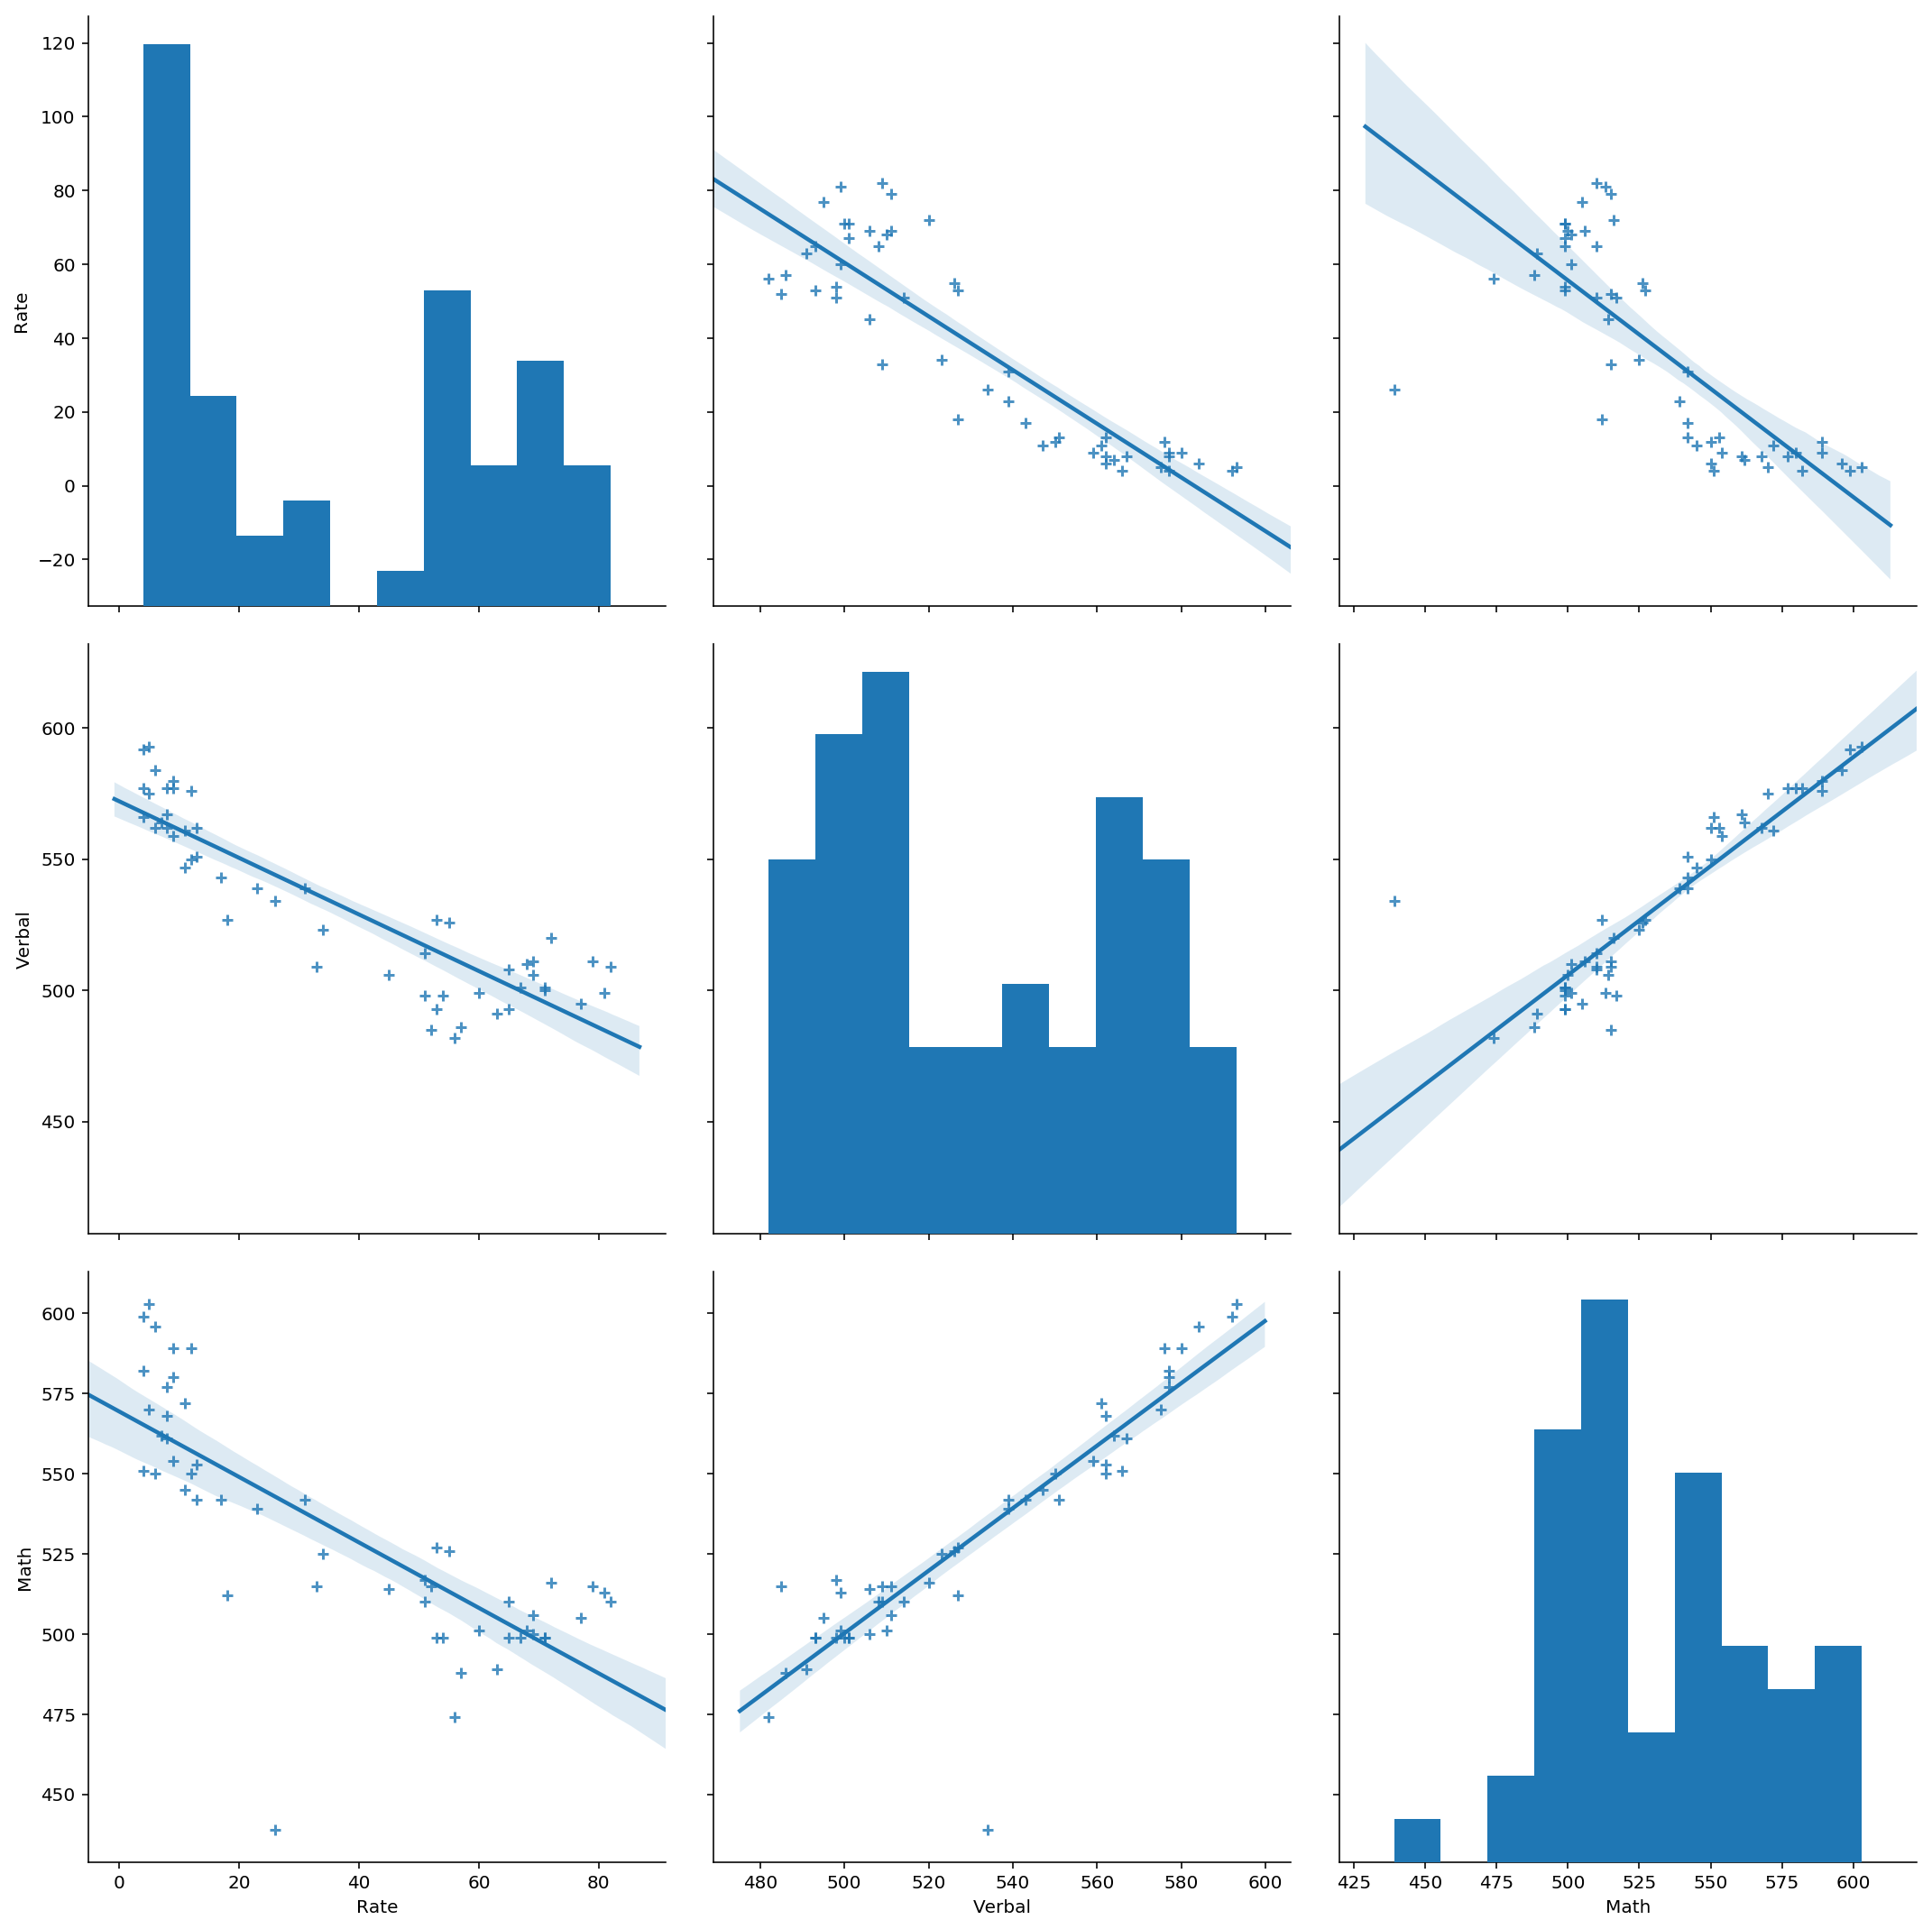

In [11]:
sns.pairplot(sat_df,kind='reg',markers='+',height=5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

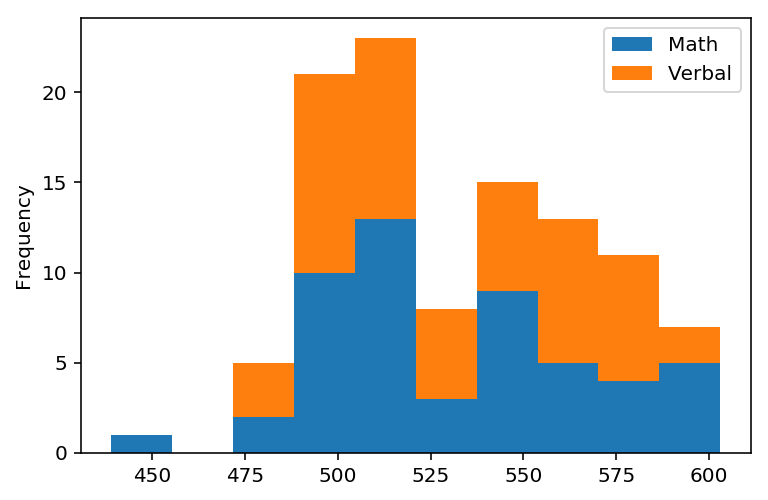

In [12]:
sat_df[['Math','Verbal']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

* Math and Verbal can be plotted on the same box plot graph because they are both in the same range of values (both are values that fall between 200-800 (to add up to 400-1600 for total SAT scores). 


* The rate column is a percentage and falls between 0-100, so it is not accurate scaled to Math and Verbal values. Standardising all the values to a similar range would fix this problem, but probably still not recommended.

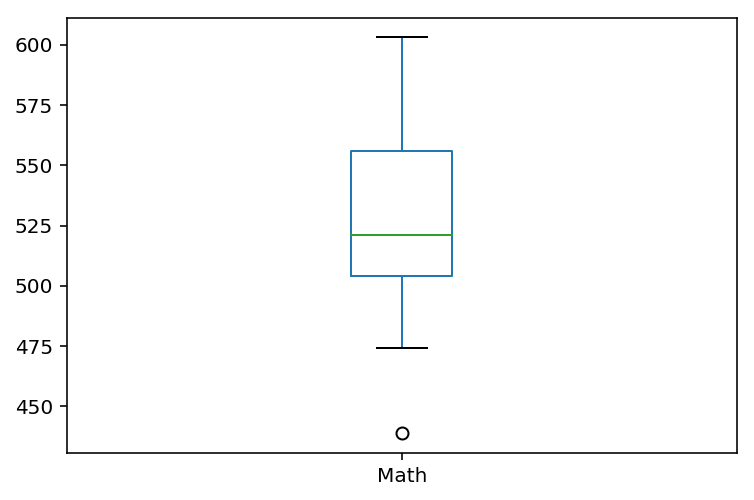

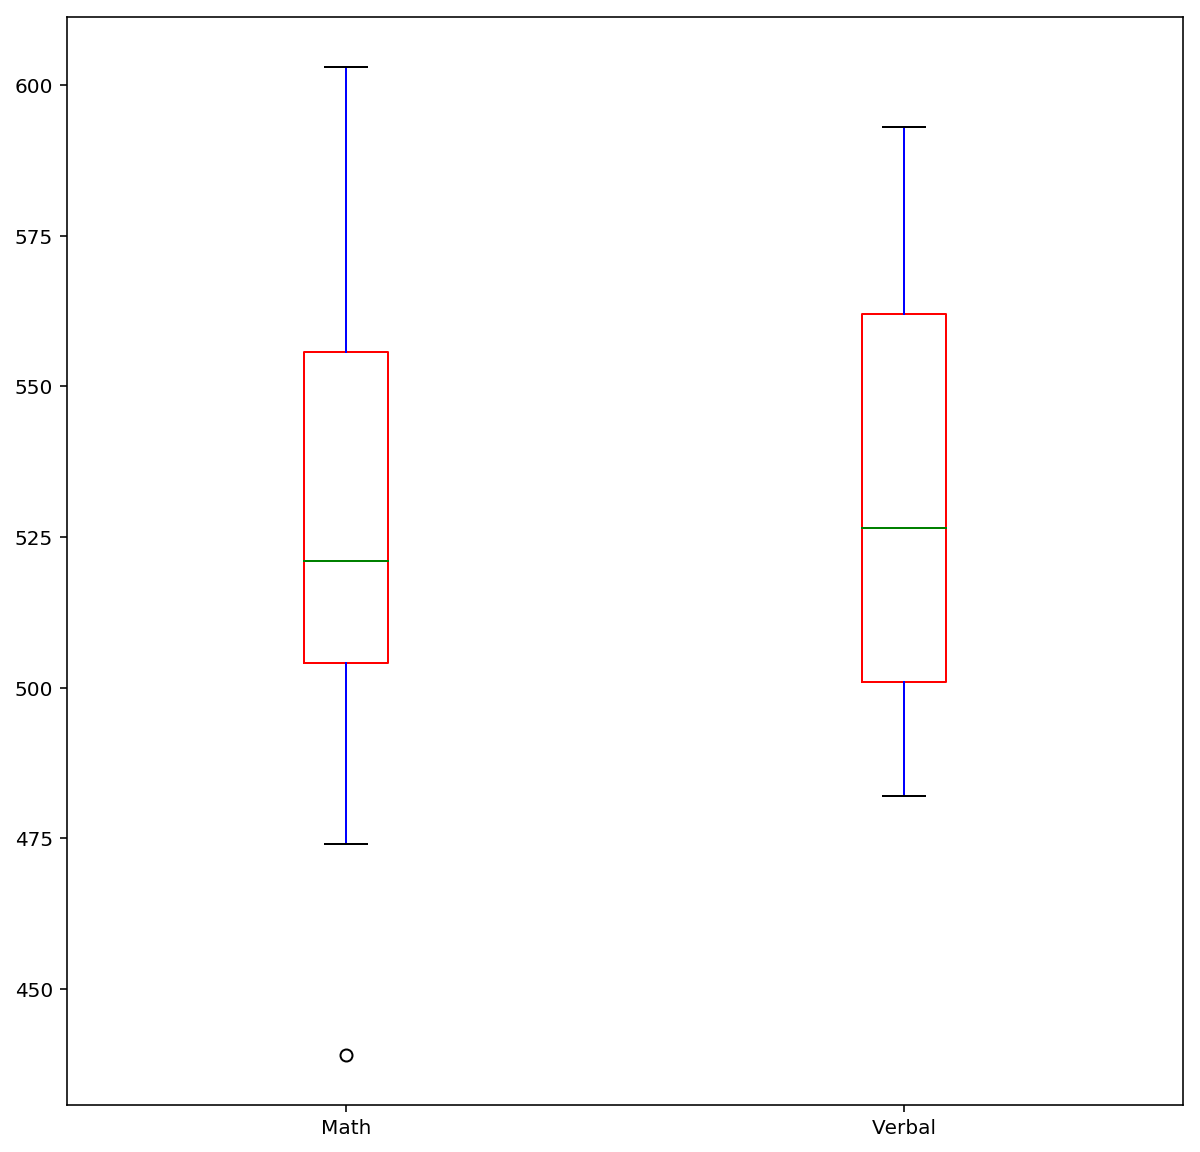

In [62]:
 color = {'boxes': 'Red', 'whiskers': 'Blue',
   ....:          'medians': 'Green'}
    
sat_df[['Math','Verbal']].plot.box(color=color,figsize=(10,10),whis=1)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


* Verbal and Math are on the same scale (between 200-800) whereas Rate is on a simple 0-100 scale. This means that to plot them all on the same boxplot graph, they must all be scaled together. 


* To do this, I decided to create two box plot charts; one that scales down the Verbal/Math columns to the Rate scale, and another that scales up Rate to the Verbal/Math scale.


* To scale down Verbal/Math I simply expressed the 200-800 scale as a 0-100 scale by taking the Verbal/Math values, taking away 200 (because the scale starts at 200) and dividing by 6 to get a 0-100 expression.

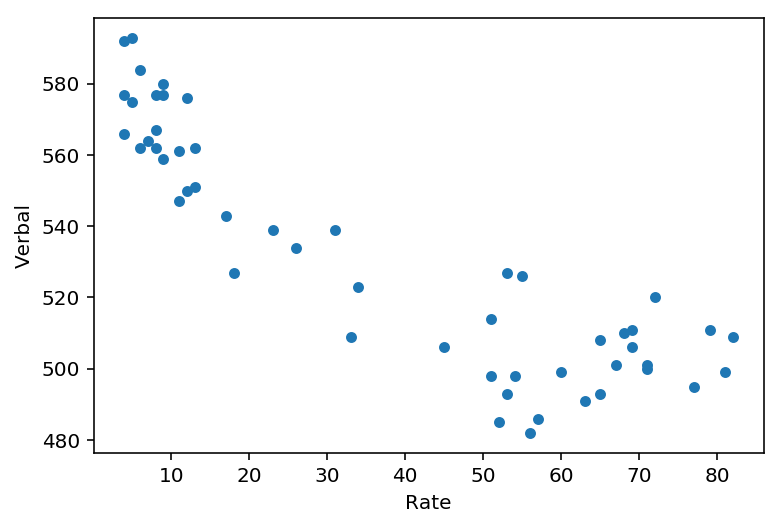

In [69]:
sat_df.plot.scatter(x='Rate',y='Verbal')

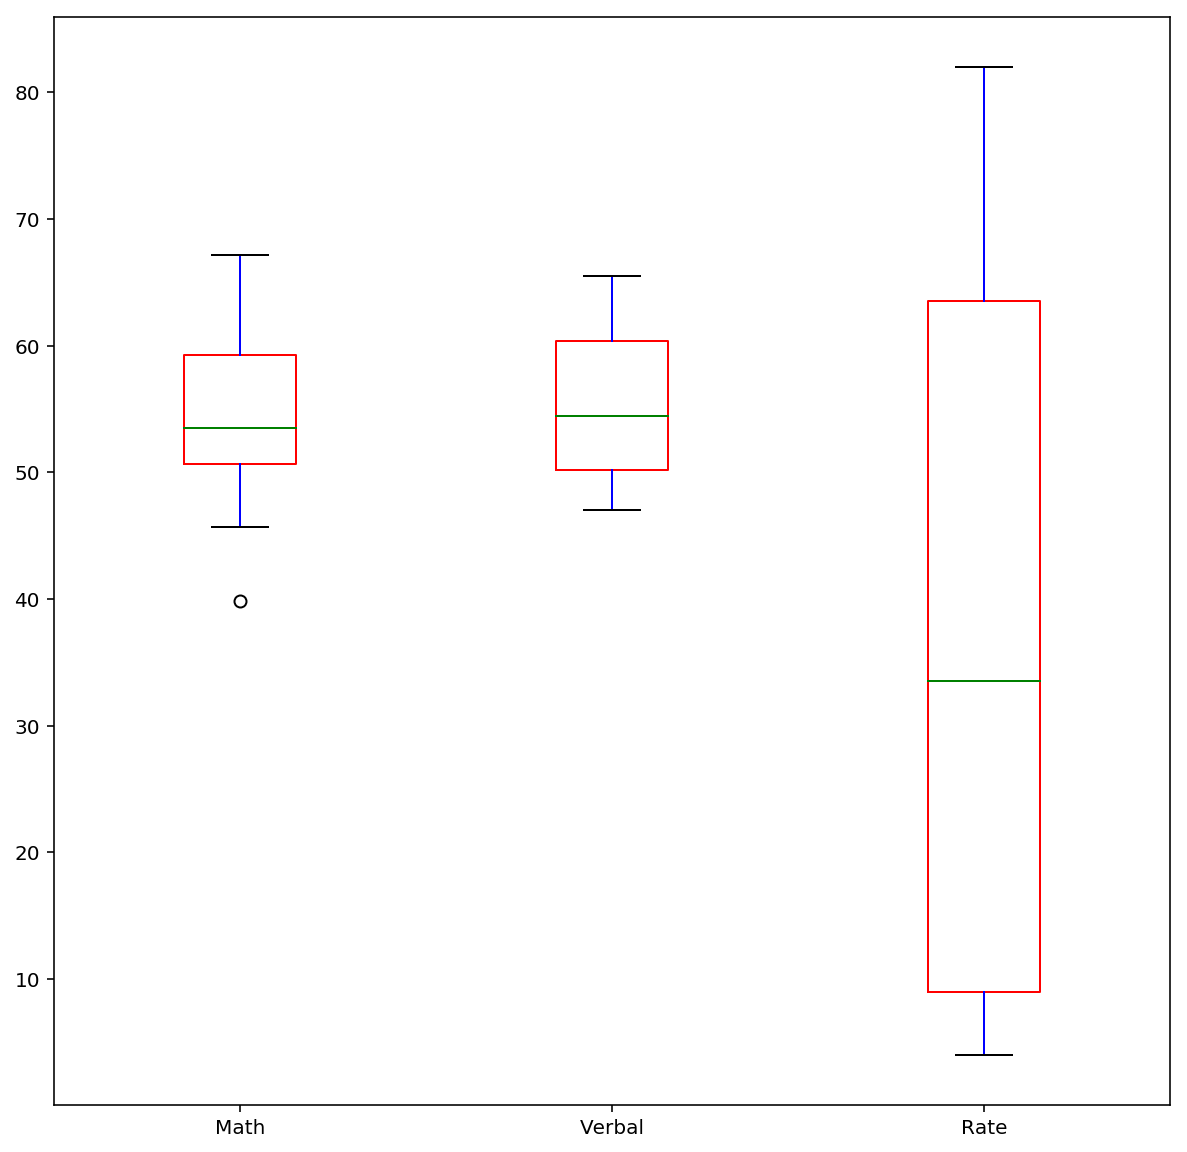

In [65]:
scaled_down_sat = sat_df[['Math','Verbal','Rate']].copy()
scaled_down_sat['Verbal'] = scaled_down_sat['Verbal'].apply(lambda x:(x-200)/6)
scaled_down_sat['Math'] = scaled_down_sat['Math'].apply(lambda x:(x-200)/6)
scaled_down_sat.plot.box(color=color,figsize=(10,10),whis=1)

* To scale up the Rate values I did the inverse of what I did before, I took each value from the rate column, multiplied it by 6 and added 200 so it would be a value between 200-800 like the Verbal/Math values.

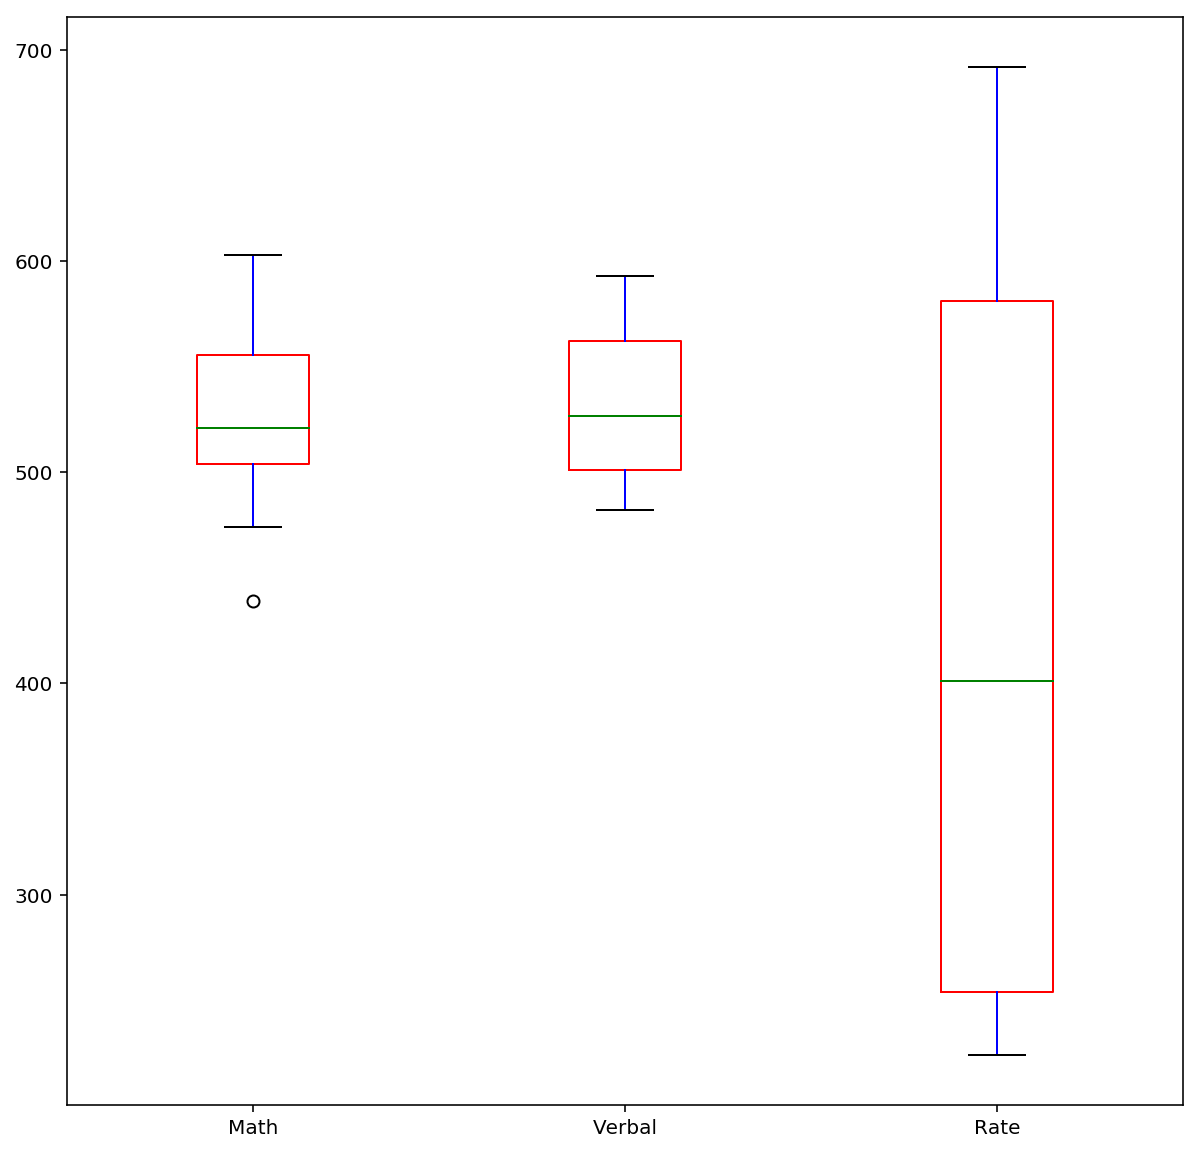

In [67]:
scaled_up_sat = sat_df[['Math','Verbal','Rate']].copy()
scaled_up_sat['Rate'] = scaled_up_sat['Rate'].apply(lambda x: x*6 + 200)
scaled_up_sat
scaled_up_sat.plot.box(color=color,figsize=(10,10),whis=1)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
state_avg_list = list(sat_df[sat_df['Verbal'] > np.mean(sat_df['Verbal'])]['State'])
num_above_avg = sat_df[sat_df['Verbal'] > np.mean(sat_df['Verbal'])]['Verbal'].count()
pp.pprint(state_avg_list,compact=True,width=40)
print('There are',num_above_avg, 'states above the mean.')

['CO', 'OH', 'MT', 'ID', 'TN', 'NM',
 'IL', 'KY', 'WY', 'MI', 'MN', 'KS',
 'AL', 'NE', 'OK', 'MO', 'LA', 'WI',
 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
There are 24 states above the mean.


* Since there are 24 states above the mean out of 51 states (50 actual states plus 1 federal district), that means approximately half of the states are above the mean. This indicates that median is very close to the mean, indicating a more normal distribution and less skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
state_med_list = list(sat_df[sat_df['Verbal'] > np.median(sat_df['Verbal'])]['State'])
num_above_med = sat_df[sat_df['Verbal'] > np.median(sat_df['Verbal'])]['Verbal'].count()
pp.pprint(state_med_list,compact=True,width=40)
print('There are',num_above_med, 'states above the median.')

['WA', 'CO', 'OH', 'MT', 'WV', 'ID',
 'TN', 'NM', 'IL', 'KY', 'WY', 'MI',
 'MN', 'KS', 'AL', 'NE', 'OK', 'MO',
 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
 'ND', 'MS']
There are 26 states above the median.


* The 26 states above the median is greater than the 24 states above the mean. From this we can infer that the mean of the 'Verbal' column is greater than the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df.head(10)

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
pos_gap_df = sat_df.sort_values(by='Verbal - Math',ascending=False).head(10).copy()
pos_gap_df.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [20]:
neg_gap_df = sat_df.sort_values(by='Verbal - Math').head(10).copy()
neg_gap_df.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sat_df[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


* The correlation matrix indicates that there is a strong **positive** linear relationship between the 'Math' and 'Verbal' columns (about 0.9 which is very high)


* It also indicates that there is a strong **negative** linear relationship between 'Rate' and 'Math'/'Verbal'. With the stronger negative linear relationship existing between 'Rate' and 'Verbal' than 'Rate' and 'Math'.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
sat_df.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


* **Count** - The number of variables (or rows) in the column.
* **Mean** - The average/mean of the indicated column (sum of column divided by number of rows).
* **Std** - The standard deviation of the columns (**DESCRIBE THE FORMULA HERE**).
* **Min** - The minimum value in the column.
* **25%** - The first quartile of all the values in the column (25th percentile).
* **50%** - The second quartile of all the values in the column also known as the **Median** (50th percentile).
* **75%** - The third quartile of all the values in the column (75th percentile). 
* **Max** - The maximum value in the column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

 
1. The covariance matrix describes how two variables increase or decrease together. When a covariance matrix is produced, the diagonal cells is the measure of variance of the one variable, while the non-diagonal cells measure the covariance (how they move together. The correlation matrix is a standardised form of the covariance matrix, i.e. it calculates how the two variables move together, but with the data being equally scaled. 


2. The process of converting covariance to correlation can be seen in the formulas below:

$${COV}_{x,y} = \frac {\sum (x_{i} - \bar{x})(y_{i} - \bar{y})}{n-1}$$


$${CORR}_{x,y} = \frac {{COV}_{x,y}}{{VAR}_{x}{VAR}_{y}}$$

As we can see the correlation formula is expressed as the covariance formula divided by the product of the two sample variances. Therefore, the process of converting the covariance matrix to a correlation matrix is to simply divide by the product of the two sample variances of the variables. This scales the covariances between a range of +1 and -1 which has the effect of standardising the sampled data to the same scale.

3. Since the correlation matrix is a standardised version of the covariance matrix, and since all values fall between -1 and +1, each value is meaningful to us given the context of the scale. A value on the covariance matrix is somewhat useless to us unless there is context given to the significance of that covariance value. The correlation matrix standardises this value and gives context to give us a much better indication of the linear relationship between those two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

**Loading in the dataframe**

In [23]:
drug_df = pd.read_csv('./Datasets/drug-use-by-age.csv')
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

**Checking if any values are missing**

In [24]:
drug_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

Every column evaluates to 0 for checking if there are any null values, meaning there are no null values in the dataframe. Although this doesn't necessarily indicate that there are no missing variables, they could be indicated by '-', we would leave '0' in there, as that indicates the presence of data, but that it evaluted to zero.

In [25]:
#Writing a function that checks for '-' and replaces it with np.nan
def nan_replacer(x):
    if x == '-':
        return np.nan
    else:
        return x

In [26]:
#Going through the dataframe and replacing every single cell with np.nan that is '-'
for column in drug_df:
    drug_df[column] = drug_df[column].apply(nan_replacer)

drug_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

* Replacing all '-' values with nan now gives us a much better indication of the what exactly is missing from the data

* Now that the missing numbers have been indicated we should clean up the datatypes

In [27]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

* We can see that there are certain numerical columns that are represented as objects. We should convert those into floats to properly do EDA.

In [28]:
#Making a custom list of column names that I had observed were represented at objects.
column_list = ['cocaine-frequency','crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','meth-frequency']
#A for loop that goes through the column names and applies the float function to convert them to floats.
for item in column_list:
    drug_df[item] = drug_df[item].apply(float)
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

* Finally I just want to do a quick rename of the columns in the dataframe. Changing the 'n' to 'number-of-subjects'

In [29]:
drug_df.rename(columns={'n':'number-of-subjects'},inplace=True)
drug_df.columns

Index(['age', 'number-of-subjects', 'alcohol-use', 'alcohol-frequency',
       'marijuana-use', 'marijuana-frequency', 'cocaine-use',
       'cocaine-frequency', 'crack-use', 'crack-frequency', 'heroin-use',
       'heroin-frequency', 'hallucinogen-use', 'hallucinogen-frequency',
       'inhalant-use', 'inhalant-frequency', 'pain-releiver-use',
       'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency',
       'tranquilizer-use', 'tranquilizer-frequency', 'stimulant-use',
       'stimulant-frequency', 'meth-use', 'meth-frequency', 'sedative-use',
       'sedative-frequency'],
      dtype='object')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### Inference of the data:

* The provided drug use data set provides us with many insights into the drug usage habits of people in the United States. 

* The insights and conclusions of this data I've visualised and described below:

* **Finding the average percentage of people using drugs and average drug use frequency by age group**

    * First i'll create separate dataframes for the drug use and frequency so I can take average across ages

In [30]:
drug_use_df = drug_df[['age','alcohol-use','marijuana-use','cocaine-use','crack-use',
                       'heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use',
                       'oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']].copy()

drug_freq_df = drug_df[['age','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency',
                       'heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency',
                       'oxycontin-frequency','tranquilizer-frequency','stimulant-frequency',
                        'meth-frequency','sedative-frequency']].copy()

In [31]:
avg_use_list = [np.mean(drug_use_df.loc[i][1:]) for i in drug_use_df.index]
avg_freq_list = [np.mean(drug_freq_df.loc[i][1:]) for i in drug_freq_df.index]

drug_use_df['drug-use-average'] = pd.Series(avg_use_list)
drug_freq_df['drug-freq-average'] = pd.Series(avg_freq_list)

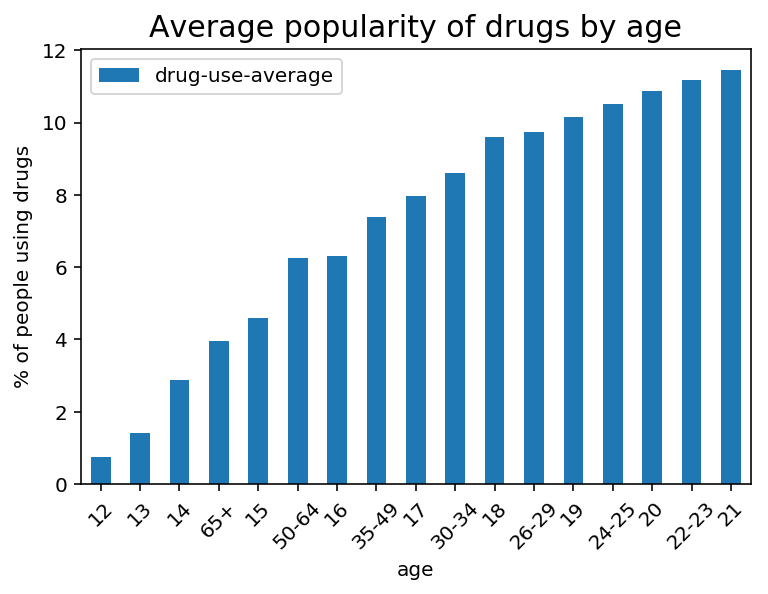

In [32]:
use_avg = drug_use_df.groupby('drug-use-average').max().reset_index().plot.bar(x='age',y='drug-use-average')
use_avg.axes.set_xticklabels(drug_use_df.groupby('drug-use-average').max().reset_index()['age'],rotation = 45)
plt.title('Average popularity of drugs by age',fontsize=15)
plt.ylabel('% of people using drugs')
plt.show()

* We can see that the younger population have a higher proportion of people using drugs, except for the 65+ range, which can probably be explained by older people relying on medications. The conclusion here is that people in their 20s have the highest proportion of people using drugs.
    * The relatively high proportion of 65+ year olds using drugs can be explained by the fact that there was much more missing data for that age group in the dataframe which would distort the average higher (since it is skewed heavily to alcohol use of which there is data for the 65+ year old group).

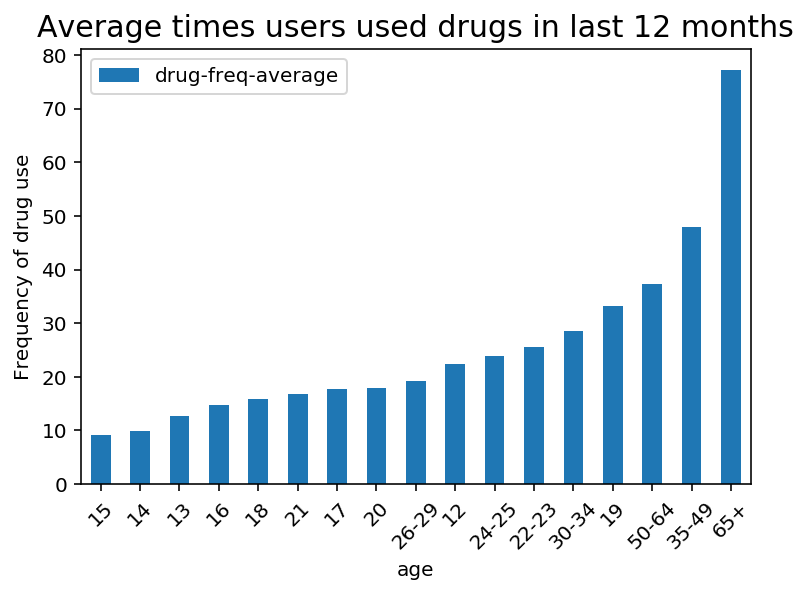

In [33]:
freq_avg = drug_freq_df.groupby('drug-freq-average').max().reset_index().plot.bar(x='age',y='drug-freq-average')
freq_avg.axes.set_xticklabels(drug_freq_df.groupby('drug-freq-average').max().reset_index()['age'],rotation = 45)
plt.title('Average times users used drugs in last 12 months',fontsize=15)
plt.ylabel('Frequency of drug use')
plt.show()

* The frequency of drug use reveals a bit more of a different story, with older age groups using drugs more often overall than younger age groups. Even though people in their 20s have the highest proportion of people using drugs, they do not use them the most frequently. This suggests that amongst the fewer users who do use drugs in older age groups, they use them much more frequently.
    * I think part of this can be explained by older people having to take medication daily, although this does not give a full answer as to why this is the case.
    
* **We can also see what age group enjoys a particular drug the most in terms of usage and frequency**

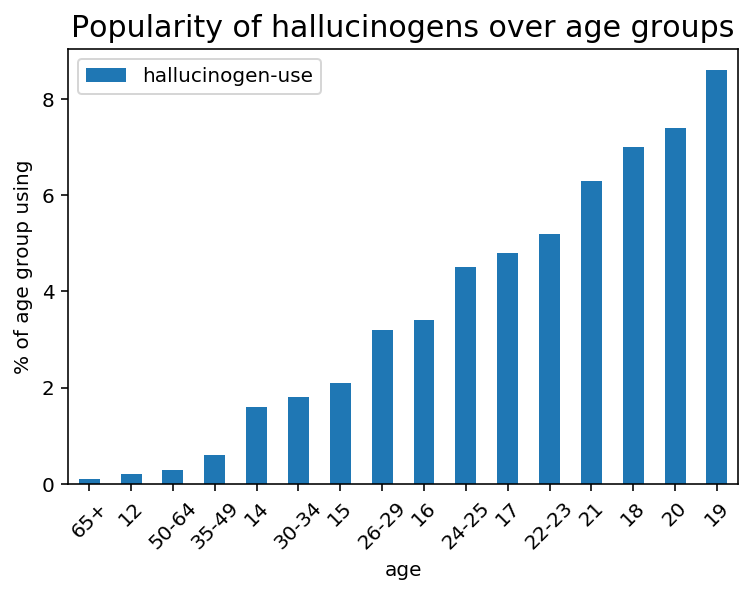

In [34]:
hal_g = drug_use_df.groupby('hallucinogen-use').max().reset_index().plot.bar(x='age',y='hallucinogen-use')
hal_g.axes.set_xticklabels(drug_use_df.groupby('hallucinogen-use').max().reset_index()['age'],rotation = 45)
plt.title('Popularity of hallucinogens over age groups',fontsize=15)
plt.ylabel('% of age group using')
plt.show()

* If we take hallucinogens as an example, we can see that late teens early 20s are the most common users.

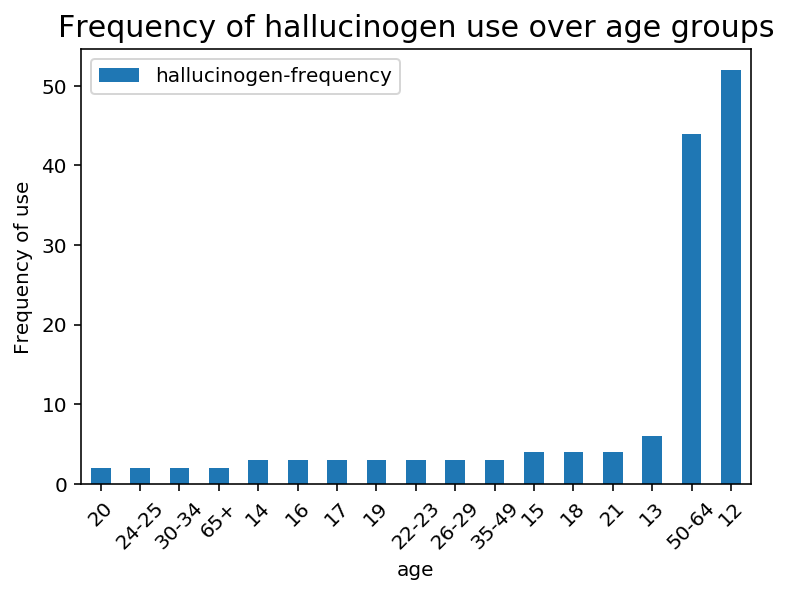

In [35]:
hal_f = drug_freq_df.groupby(['hallucinogen-frequency','age']).max().reset_index().plot.bar(x='age',y='hallucinogen-frequency')
hal_f.axes.set_xticklabels(drug_freq_df.groupby(['hallucinogen-frequency','age']).max().reset_index()['age'],rotation = 45)
plt.title('Frequency of hallucinogen use over age groups',fontsize=15)
plt.ylabel('Frequency of use')
plt.show()

* When we try and plot the frequency of hallucinogen use, we can see a very different story. Hallucinogen use remains approximately the same across all age groups except for 50-64 and 12 year olds. 
    * I can think of no logical explanation for this, other than there were not enough data points for 12 and 50-64 year olds who used hallucinogens which would heavily skew the median upwards for one extreme user.


* What we can conclude from this though is that use of hallucinogens is largely consistent across age groups and that the popular the use of the drug use the more frequently it is used isn't true.


* **We can also see the most popular and most frequently used drugs over specific age groups**

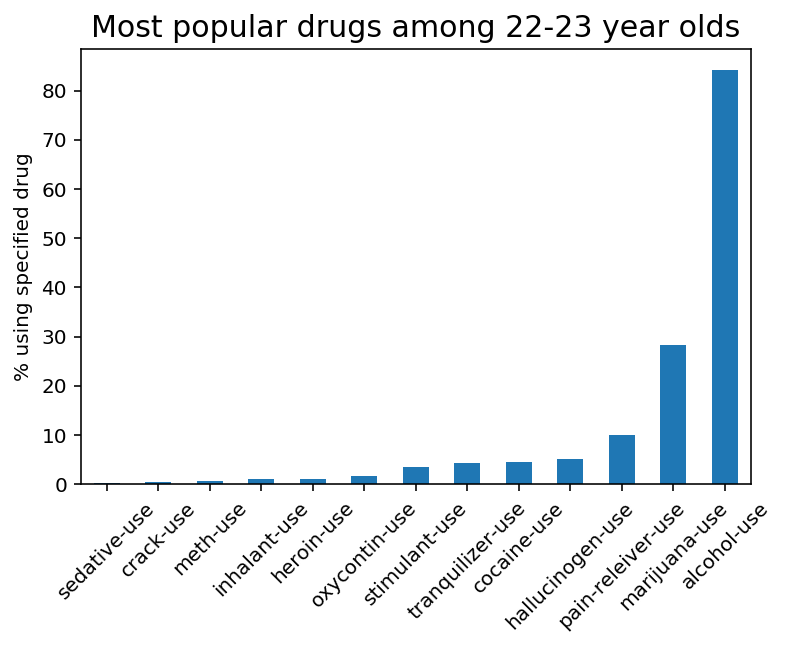

In [36]:
the_fig = drug_use_df.T[10][1:14].sort_values().plot(kind='bar')
the_fig.axes.set_xticklabels(pd.DataFrame(drug_use_df.T[10][1:14].sort_values()).reset_index()['index'],rotation = 45)
plt.title('Most popular drugs among 22-23 year olds',fontsize=15)
plt.ylabel('% using specified drug')
plt.show()

* Unsurprisingly, 22-23 year olds mostly use alcohol and marijuana, with the third most popular drug being pain-relievers.

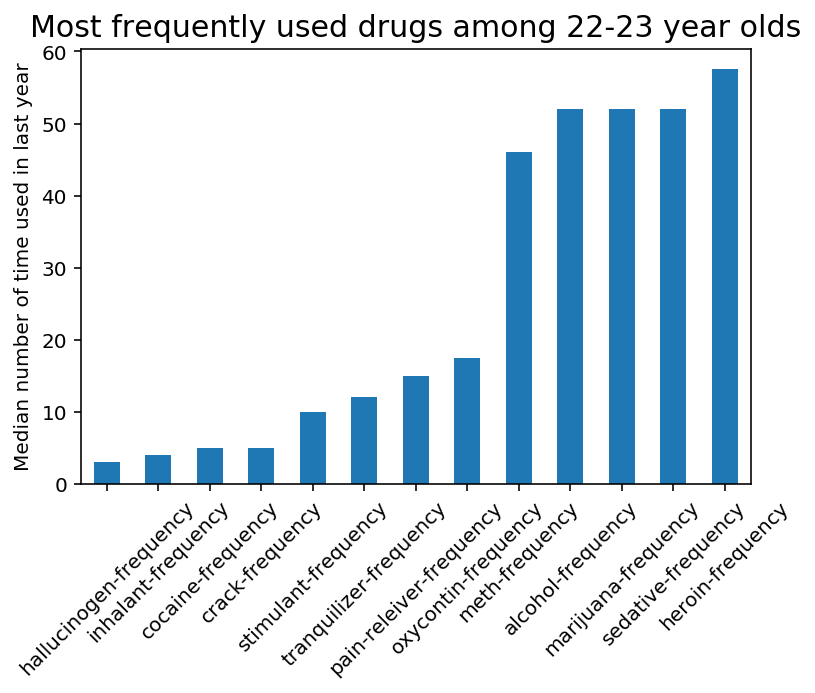

In [37]:
the_fig = drug_freq_df.T[10][1:14].sort_values().plot(kind='bar')
the_fig.axes.set_xticklabels(pd.DataFrame(drug_freq_df.T[10][1:14].sort_values()).reset_index()['index'],rotation = 45)
plt.ylabel('Median number of time used in last year')
plt.title('Most frequently used drugs among 22-23 year olds',fontsize=15)
plt.show()

* Much like the frequency average, heroin is the mostly frequently used drug among 22-23 year olds. However, this figure is not too much greater than sedatives and marijuana, indicating that younger people use more drugs more often.

* **The data also reveals the most popular drugs being used by the sample, and the most frequently used drugs being used by the sample**

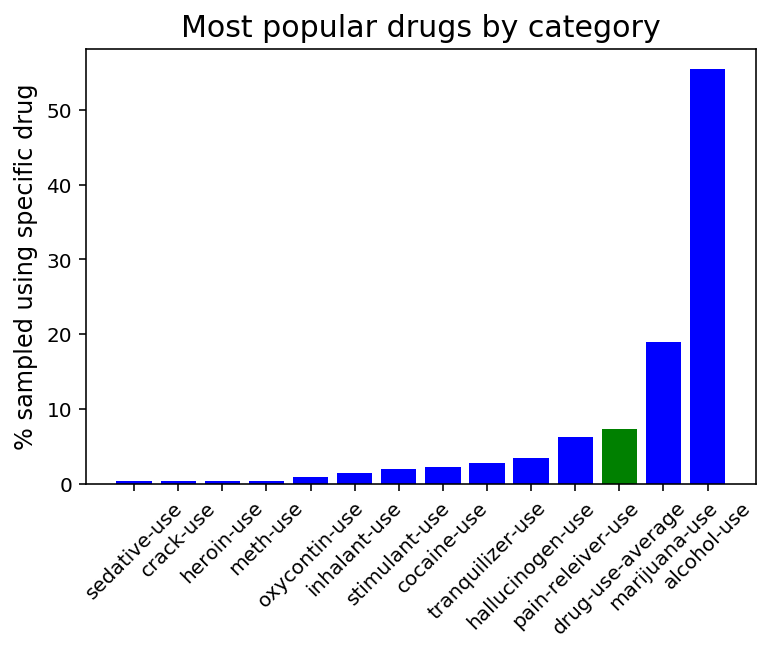

In [38]:
y_pos = np.arange(len(pd.DataFrame(drug_use_df.mean()).T.columns))
code_list = ['green' if x=='drug-use-average' else 'blue' for x in pd.DataFrame(drug_use_df.mean().sort_values()).T.columns]

#plt.figure(figsize=(15,8))
plt.bar(y_pos,height=drug_use_df.mean().sort_values(),color=code_list)
plt.title('Most popular drugs by category',fontsize=15)
plt.ylabel('% sampled using specific drug',fontsize=12)
plt.xticks(y_pos,pd.DataFrame(drug_use_df.mean().sort_values()).T.columns,rotation=45)
plt.show()

* Here we can see that (unsurprisingly), alcohol and marijuana are amongst the most popular drugs being used by the sample, with alcohol dwarfing everything else (which is self evident as alcohol is legal and widely available everywhere in the USA).

* The bar marked in green is the average usage across all drugs. Unsurprisingly again, only alcohol and marijuana are above the average, with pain relievers and hallucinogens just below the average.

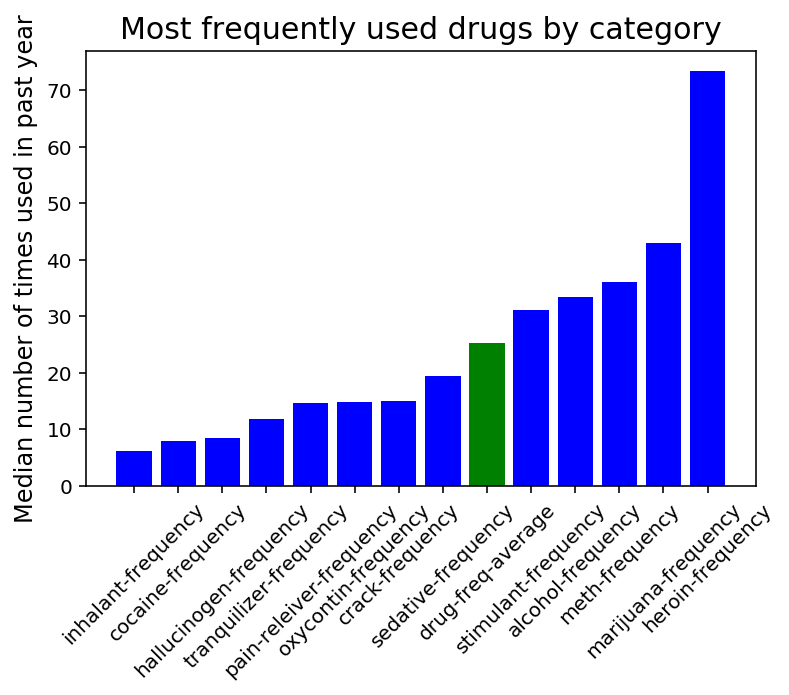

In [39]:
y_pos = np.arange(len(pd.DataFrame(drug_freq_df.mean()).T.columns))
code_list = ['green' if x=='drug-freq-average' else 'blue' for x in pd.DataFrame(drug_freq_df.mean().sort_values()).T.columns]

#plt.figure(figsize=(15,8))
plt.bar(y_pos,height=drug_freq_df.mean().sort_values(),color=code_list)
plt.title('Most frequently used drugs by category',fontsize=15)
plt.ylabel('Median number of times used in past year',fontsize=12)
plt.xticks(y_pos,pd.DataFrame(drug_freq_df.mean().sort_values()).T.columns,rotation=45)
plt.show()

* Here we see that frequency of use is quite different to popularity of use. With heroin being the most frequently used drug (among users) by far. This isn't surprising, given its extremely addictive properties and brutal withdrawal symptoms.

* Stimulants, alcohol, meth and marijuana were also above the frequency of use average, while inhalants and cocaine (surprisingly) were amongst the least frequently used drugs among their users.

* **The data can also help find the relationship between popularity and frequency of usage of different drugs**

* Plotting the correlation matrix for drug use and drug frequency allowed me to understand whether certain drugs were often used together.

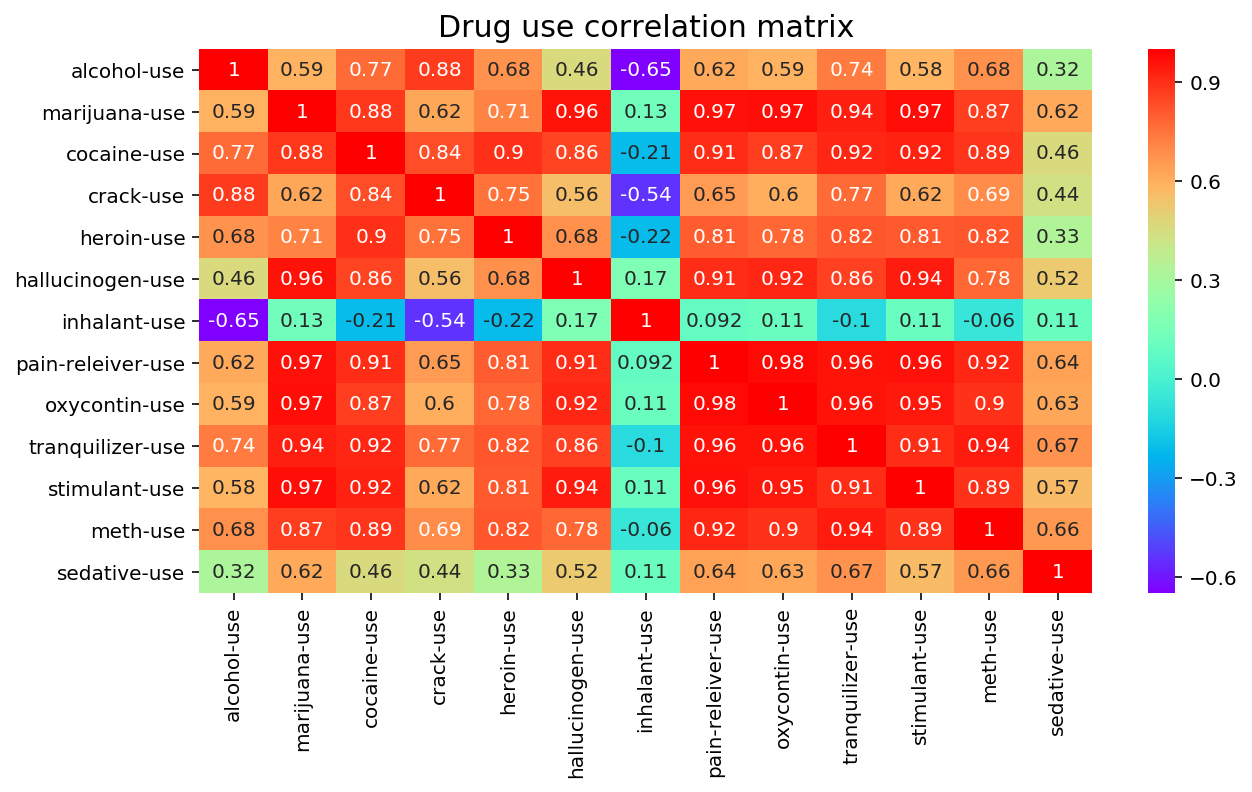

In [40]:
plt.figure(figsize=(10,5))
plt.title('Drug use correlation matrix',fontsize=15)
sns.heatmap(drug_use_df.drop(['drug-use-average'],axis=1).corr(),annot=True,cmap='rainbow')
plt.show()

* Here we can see the heatmap of the correlation matrix of the drug use dataframe. Some interesting insights:
    * The drugs that offer medicinal pain relieving properties had the strongest correlation to each other. For example, marijuana and oxycontin both offer pain relief, so it is no surprise that their use is strongly correlated as people tend to combine medicines to offer more powerful pain relief. 
    
    * Hallucinogen use and marijuana use also strongly correlate to one another. A possible reason is that both marijuana and hallucinogens (such as psilocibin mushrooms and LSD) are both psychedelics and their properties can complement each other. 

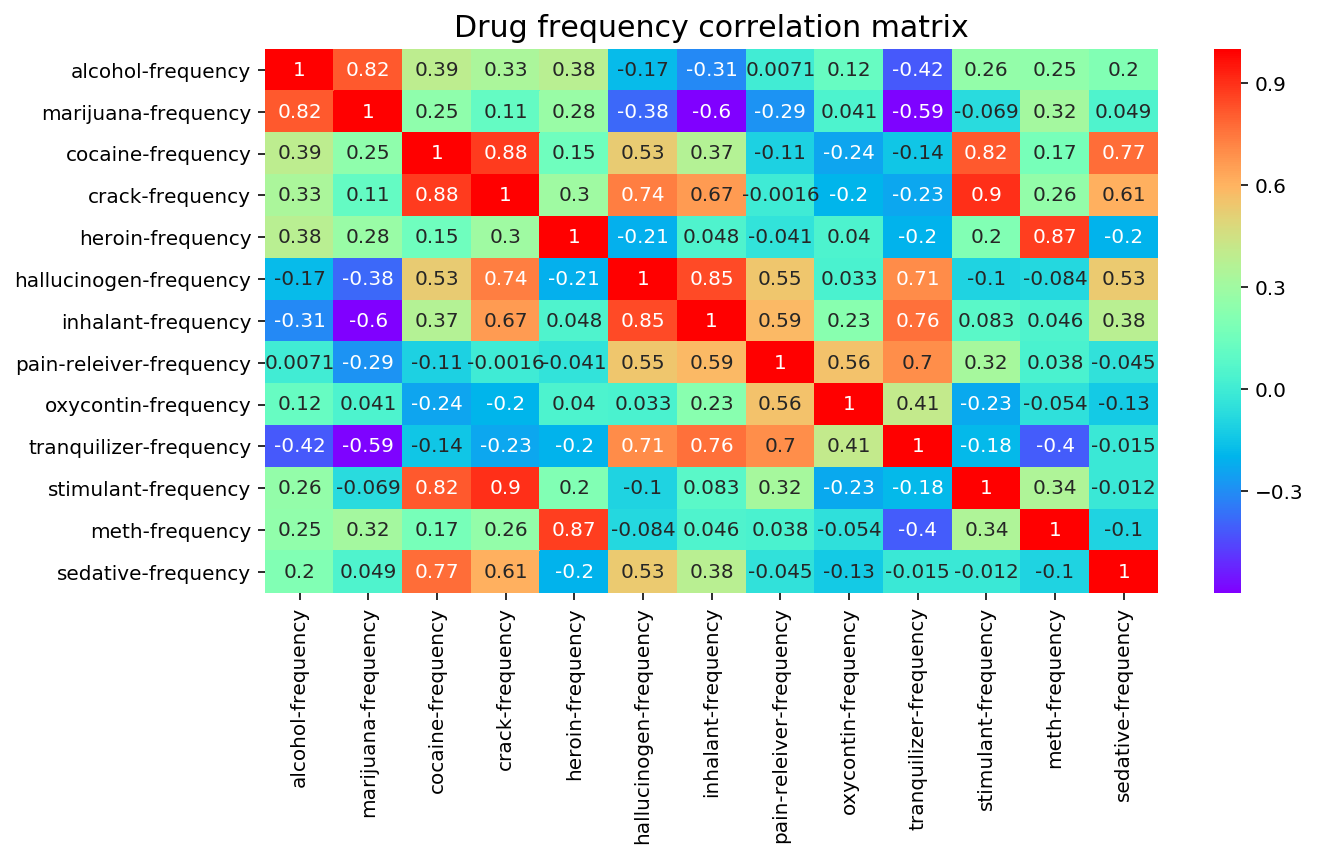

In [41]:
plt.figure(figsize=(10,5))
plt.title('Drug frequency correlation matrix',fontsize=15)
sns.heatmap(drug_freq_df.drop(['drug-freq-average'],axis=1).corr(),annot=True,cmap='rainbow')
plt.show()

* Here we can see a heatmap of the correlation matrix of the frequency dataframe. Some insights:
    * Stimulants and crack frequency have a strong positive linear relationship, indicating that the higher the frequency of cocaine use, so too the frequency of stimulant use. Since crack is a stimulant itself, people who tend to use crack often, would also be much more likely to use other stimulants often, as the stimulant effect is what is addictive. 
    
    * Heroin and meth also had a strong positive linear relationship. This could potentially be explained by people wanting to use meth and much as they would heroin, as heroin is usually what is used to comedown of prolonged meth use (a downer to the upper effect).
    
### Conclusion:

* The provided data gives us a valuable insight into the drug taking habits of Americans. It reveals to us how drug use differs as people get older, which drugs are the most popular, and how different drugs appeal to different age demographics more than others. It also tells us the most popular drugs being used by the sample and which drugs are most frequently used. We also can see how the use and frequency of use of different drugs relates to each other, and reveals to us which drugs may be perceived as being complementary to each other. 

* Overall, this dataset tells us a story of the drug taking habits of Americans, and the story of how drugs are used and to which age they appeal to most. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

## Is the use of oxycontin a pathway to heroin?

**Background**

* The USA is in the grips of one of its word drug epidemics in its history. The main culprit, opioids are wreaking havoc on midwestern towns and regions and causing incalculable suffering. But why has the opioid crisis taken hold so recently? Heroin has been around for a long time, so we can assume that its existence and prevalence isn't the main cause. 

* Oxycontin, a commonly prescribed painkiller that was known to be pushed by big pharma companies like Pfizer to treat a wide range of pains and illnesses is a potent opioid with incredibly addictive properties. Although its addictivness and harm potential was known, it was still prescribed without much scrutiny across all of the USA. When people caught on and the laws were changed to tighten the availability of Oxycontin, suddenly there were millions of people with an opioid addiction who could not get refills to their prescriptions anymore.

* Opioid withdrawal is one of the worst withdrawals a person can go through. So extreme are the symptoms that people will resort to anything to relieve their pain. With millions of people being left with an opioid addiction, many turned to heroin, another potent opioid that would alleviate their withdrawal symptoms. 

**Hypothesis**

* My hypothesis will test **whether the correlation between oxycontin use and heroin use is statistically significant** enough to assume that perhaps people who use oxycontin will also use heroin. While this is not a cause and effect relationship, it is a step in the right direction in answering whether those two factors are related.

**Deliverables**

* To look further into whether or not the use of oxycontin and heroin are related, I will provide a correlation matrix, a scatter plot and a bar chart. The correlation matrix will see the actual correlated figure relative to other correlations from other drugs and see how strong this correlation is. The scatter plot will look at the strength of the linear relationship between heroin use and oxycontin use. Finally, the bar chart will just simply compare the usage of heroin and oxycontin over the age brackets.


* **Correlation matrix**: 

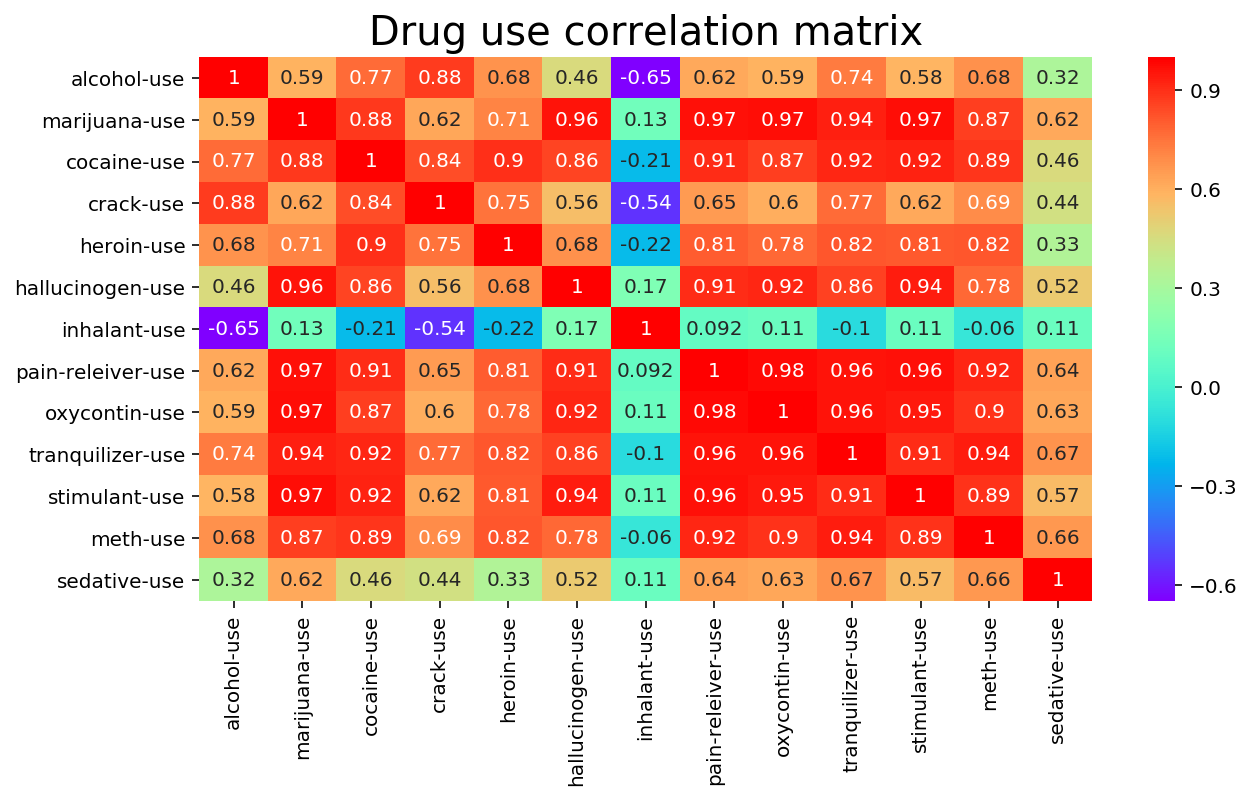

In [42]:
plt.figure(figsize=(10,5))
plt.title('Drug use correlation matrix',fontsize=20)
sns.heatmap(drug_use_df.drop(['drug-use-average'],axis=1).corr(),annot=True,cmap='rainbow')
plt.show()

* This correlation matrix describes all the possible correlations between different drugs and their usage. The purpose of this chart is to demonstrate that the correlation between oxycontin use and heroin use is among the higher correlations in the matrix. While not as high as some others, I believe it is still enough to warrant a hypothesis test to see how significant its correlation is.


* **Scatter plot**:

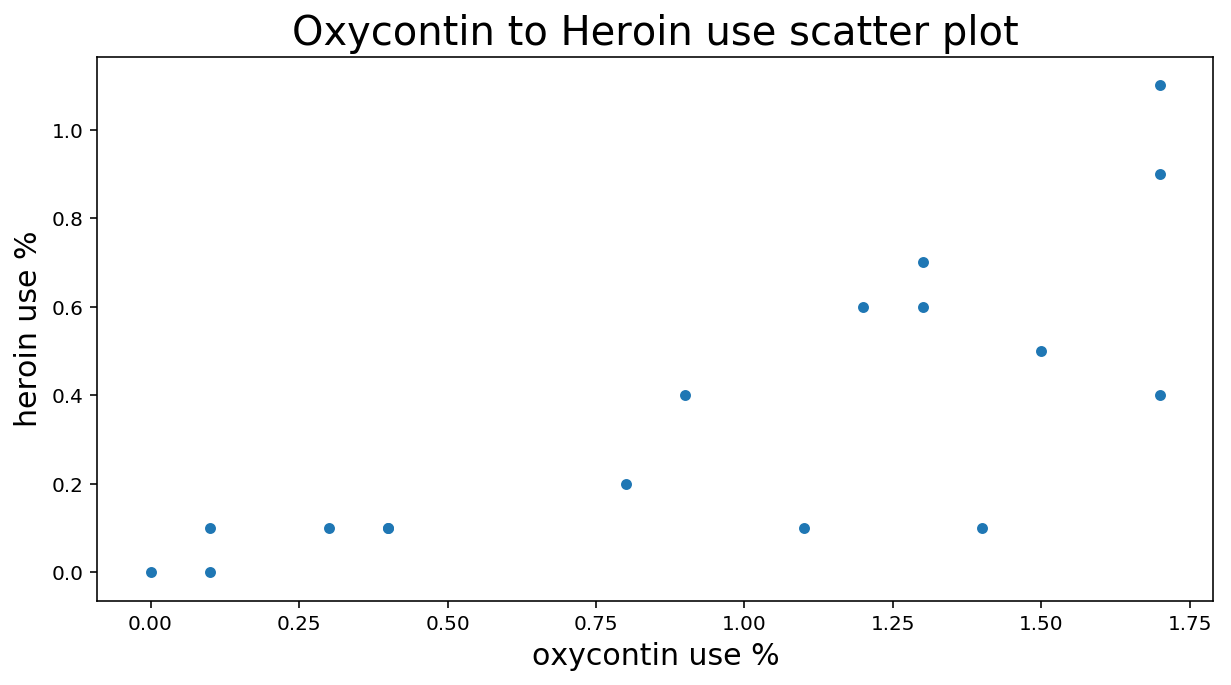

In [43]:
drug_use_df.plot.scatter(x='oxycontin-use',y='heroin-use',figsize=(10,5))
plt.title('Oxycontin to Heroin use scatter plot',fontsize=20)
plt.ylabel('heroin use %',fontsize=15)
plt.xlabel('oxycontin use %',fontsize=15)
plt.show()

* The scatter plot here is used to observe the relationship more closely between heroin and oxycontin use. With closely correlated variables, we'd expect to see the points converge towards an upwards sloping line for a positive linear relationship (or downwards sloping for negative linear relationship). We can see that there is some linearity, but also a great deal of outliers from the observed straight line. To me, this suggests that there does exist a relationship, so testing its significance is more warranted.


* **Bar chart**:

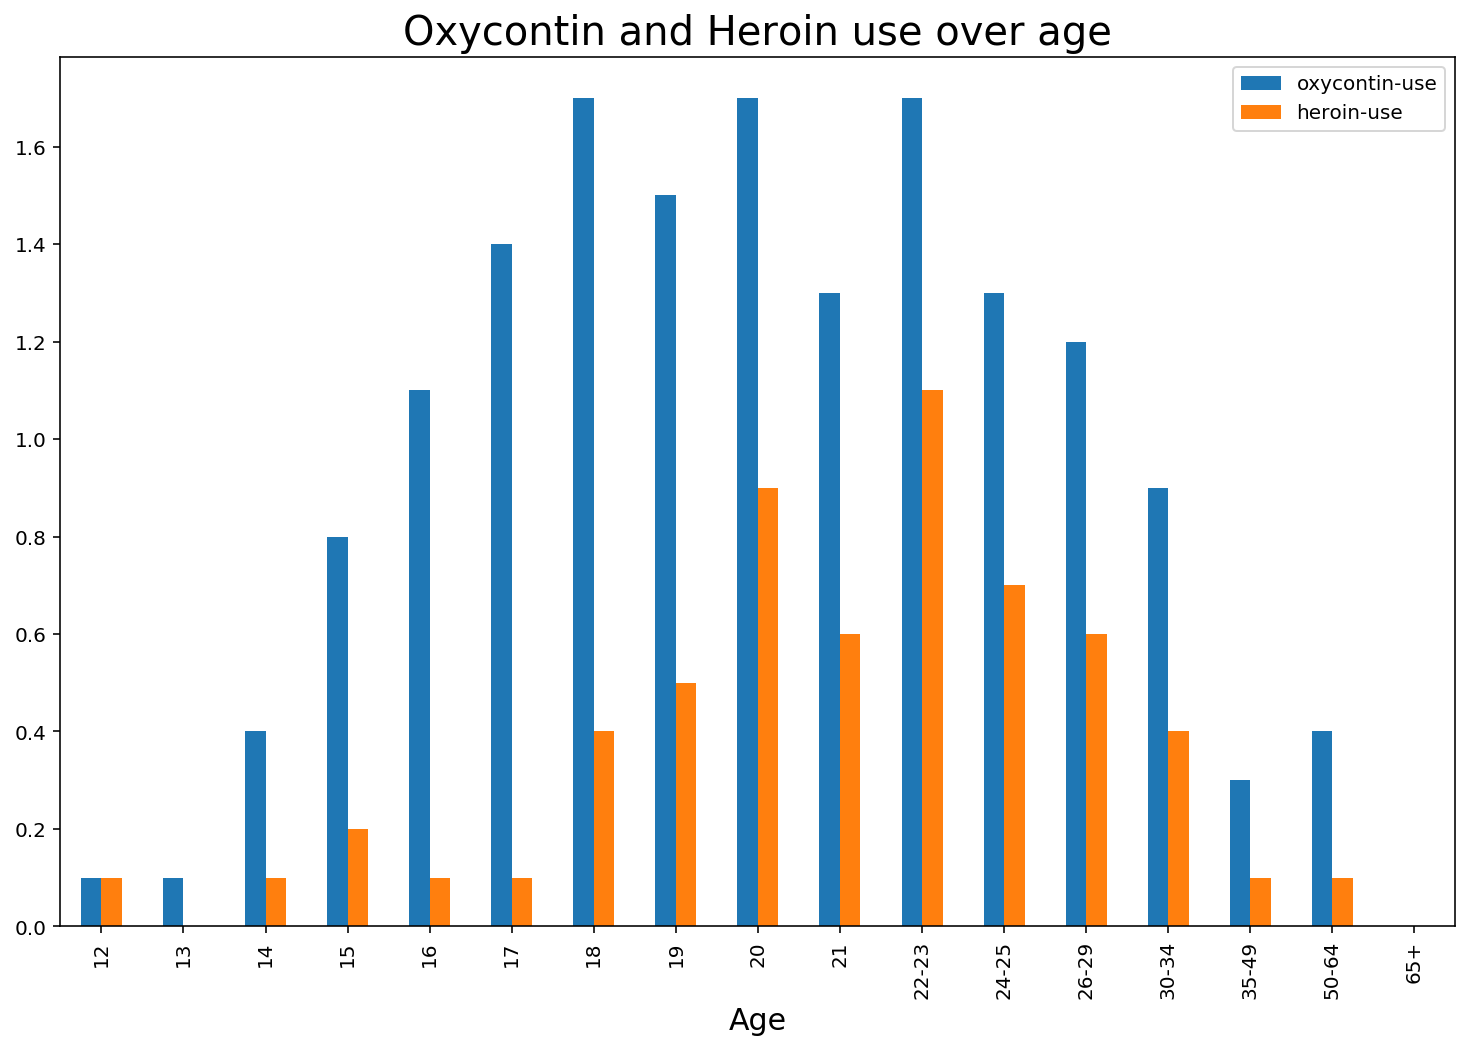

In [44]:
drug_use_df[['oxycontin-use','heroin-use']].set_index(drug_use_df['age']).plot(kind='bar',figsize=(12.5,8))
plt.title('Oxycontin and Heroin use over age',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.show()

* The bar chart here compares heroin use and oxycontin use over all the age brackets. We can see that generally, they do tend to move together, mainly in the older age ranges. This suggests that perhaps a stronger correlation figure would exist if we excluded the younger age brackets from the analysis.


**The Hypothesis test**

* Null Hypothesis **H<sub>0</sub>** : **The observed correlation of heroin and oxycontin use is not significantly different from zero.**

$$\rho =0$$

* Alternate Hypothesis **H<sub>1</sub>** : **The observed correlation of heroin and oxycontin use is signifcantly different from zero.**

$$\rho\neq0$$

* To test significance I'll be using a two-tailed t-test using the following formula:

#### $$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^{2}}}$$

* Where:
    * t = the value of the t statistic
    * r = the observed correlation of the samples
    * n - 2 = the degrees of freedom



In [45]:
def t_stat_corr(df,col1,col2):
    r = stats.pearsonr(df[col1],df[col2])[0]
    n = len(df[col1])
    t = r*(np.sqrt(n-2)) / np.sqrt(1 - (r**2))
    return t

t_stat = t_stat_corr(drug_use_df,'heroin-use','oxycontin-use')
print('The t-statistic value is {0:.2f}'.format(t_stat))

The t-statistic value is 4.75


* Running the t-statistic function based on the above formula we get a result of 4.75, to visualise where this lies on the t distribution, I will plot the positive and negative t-stat.

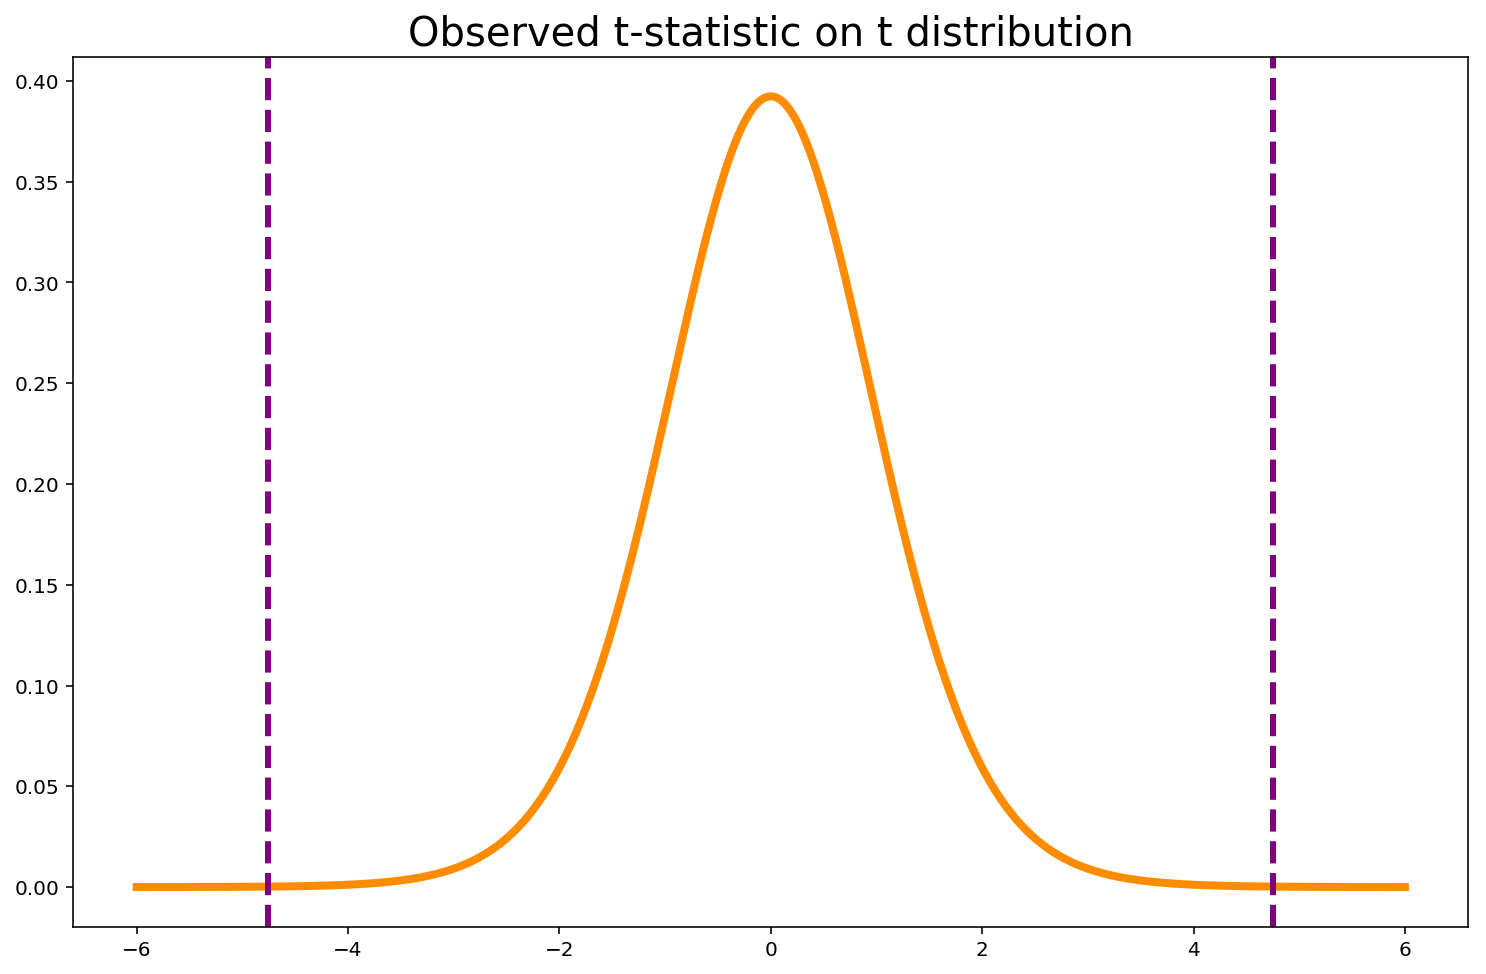

In [46]:
xpoints = np.linspace(-6, 6, 500)
ypoints = stats.t.pdf(xpoints, 15, 0, 1)

fig = plt.figure(figsize=(12.5,8))
ax = fig.gca()

ax.plot(xpoints, ypoints, linewidth=4, color='darkorange')
ax.axvline(t_stat, color='purple', linestyle='--', lw=3)
ax.axvline(-t_stat, color='purple', linestyle='--', lw=3)
plt.title('Observed t-statistic on t distribution',fontsize=20)
plt.show()

* As we can see already, the t-statistic lies on the extremities of the t distribution, indicating that the area below the curve after the positive t-stat and before the negative t-stat will be extremely small and therefore the P-Value will be extremely small.

In [47]:
lower_tail = stats.t.cdf(-t_stat, 15, 0, 1)
upper_tail = 1. - stats.t.cdf(t_stat, 15, 0, 1)
p_value = lower_tail+upper_tail
print('The P-Value is {0:.4f}'.format(p_value))

The P-Value is 0.0003


* Using our significance threshold of:
$$\alpha = 0.05$$


* We can see that the P-Value of 0.0003 falls far below this, and thus **we can reject the null hypothesis**, and that the observed correlation is significantly different from zero.

* Thus we can conclude that the correlation between heroin and oxycontin is significantly different from zero, indicating a significant linear relationship.

**Generating Confidence Intervals**

* To add a little more to our hypothesis test I would also like to generate the 90%, 95%, and 99% confidence intervals and plot them.

In [48]:
def bootstrap_corr(df,col1,col2,iters=1000):
    corr_list = []
    for i in range(iters):
        samp_df = df.iloc[np.random.choice(df.index,replace=True,size=len(df.index))][[col1,col2]]
        random_corr = stats.pearsonr(samp_df[col1],samp_df[col2])[0]
        corr_list.append(random_corr)
    return corr_list

* Here writing a function that generates dataframe of potential samples of the correaltions and selects them randomly. This iterates over a specified number of times to generate a list of potential correlations.

In [49]:
#90% Confidence Interval
drug_corr90 = bootstrap_corr(drug_use_df,'heroin-use','oxycontin-use',iters=10000)
drug_lower90 = stats.scoreatpercentile(drug_corr90, 5.0)
drug_upper90 = stats.scoreatpercentile(drug_corr90, 95.0)

In [50]:
#95% Confidence Interval
drug_corr95 = bootstrap_corr(drug_use_df,'heroin-use','oxycontin-use',iters=10000)
drug_lower95 = stats.scoreatpercentile(drug_corr95, 2.5)
drug_upper95 = stats.scoreatpercentile(drug_corr95, 97.5)

In [51]:
#99% Confidence Interval
drug_corr99 = bootstrap_corr(drug_use_df,'heroin-use','oxycontin-use',iters=10000)
drug_lower99 = stats.scoreatpercentile(drug_corr99, 0.5)
drug_upper99 = stats.scoreatpercentile(drug_corr99, 99.5)

In [52]:
print('90% Confidence Interval:')
print('Low bound is: {0:.2f}'.format(drug_lower90))
print('Oberved correlation is: {0:.2f}'.format(stats.pearsonr(drug_use_df['heroin-use'],drug_use_df['oxycontin-use'])[0]))
print('Upper bound is: {0:.2f}'.format(drug_upper90))

90% Confidence Interval:
Low bound is: 0.61
Oberved correlation is: 0.78
Upper bound is: 0.91


In [53]:
print('95% Confidence Interval:')
print('Low bound is: {0:.2f}'.format(drug_lower95))
print('Oberved correlation is: {0:.2f}'.format(stats.pearsonr(drug_use_df['heroin-use'],drug_use_df['oxycontin-use'])[0]))
print('Upper bound is: {0:.2f}'.format(drug_upper95))

95% Confidence Interval:
Low bound is: 0.57
Oberved correlation is: 0.78
Upper bound is: 0.94


In [54]:
print('99% Confidence Interval:')
print('Low bound is: {0:.2f}'.format(drug_lower99))
print('Oberved correlation is: {0:.2f}'.format(stats.pearsonr(drug_use_df['heroin-use'],drug_use_df['oxycontin-use'])[0]))
print('Upper bound is: {0:.2f}'.format(drug_upper99))

99% Confidence Interval:
Low bound is: 0.50
Oberved correlation is: 0.78
Upper bound is: 0.97


* Now that the 90/95/99% confidence intervals have been generated, it is time to plot them over the distribution plot of every bootstrapped sample.

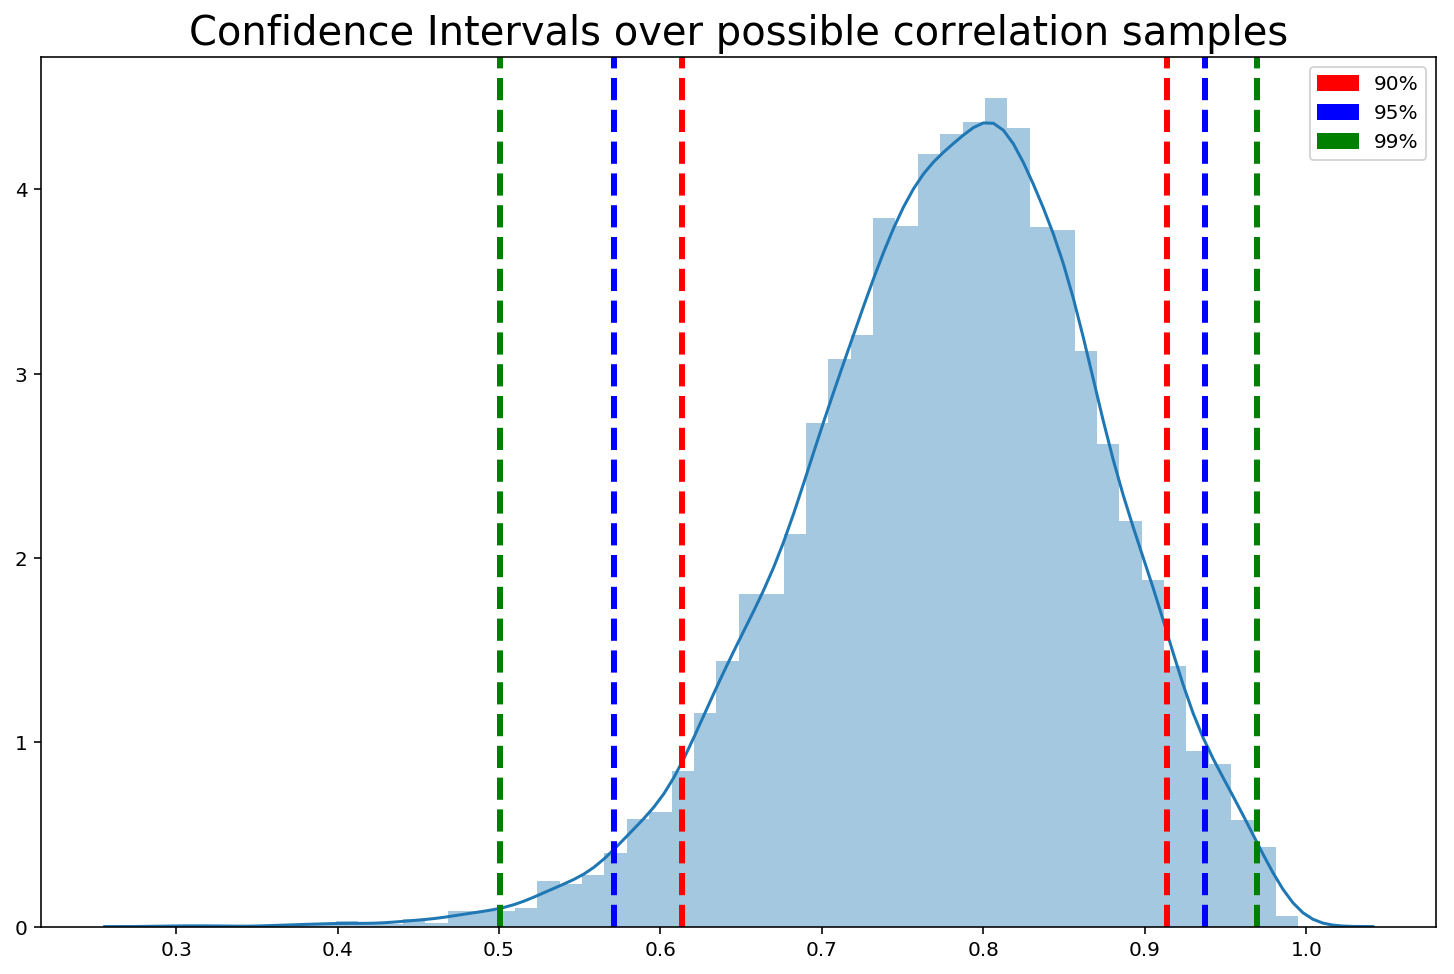

In [55]:
fig = plt.figure(figsize=(12.5,8))
ax = fig.gca()
sns.distplot(bootstrap_corr(drug_use_df,'heroin-use','oxycontin-use',iters=10000))

ax.axvline(drug_upper90, color='red', linestyle='--', lw=3)
ax.axvline(drug_lower90, color='red', linestyle='--', lw=3)

ax.axvline(drug_upper95, color='blue', linestyle='--', lw=3)
ax.axvline(drug_lower95, color='blue', linestyle='--', lw=3)

ax.axvline(drug_upper99, color='green', linestyle='--', lw=3)
ax.axvline(drug_lower99, color='green', linestyle='--', lw=3)

red_patch = mpatches.Patch(color='red', label='90%')
green_patch = mpatches.Patch(color='blue', label='95%')
blue_patch = mpatches.Patch(color='green', label='99%')
plt.legend(handles=[red_patch,green_patch,blue_patch])

plt.title('Confidence Intervals over possible correlation samples',fontsize=20)
plt.show()

* From this we can now state:
    * **99%** : If we pulled 100 samples and constructed confidence interval with them 99 of them would contain the true correalation between 0.49 and 0.97
    * **95%** : If we pulled 100 samples and constructed confidence interval with them 95 of them would contain the true correalation between 0.57 and 0.93
    * **90%** : If we pulled 100 samples and constructed confidence interval with them 90 of them would contain the true correalation between 0.62 and 0.92
    
**Conclusion**

* Now that we have rejected the null hypothesis and shown that the correlation is significantly not zero, we can say that there **does exist a linear relationship between the use of oxycontin and heroin**. While this **does not suggest that there is a causative relationship** between the two, the existence of a linear relationship is an indicator that their use might be related, and should be investigated further.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

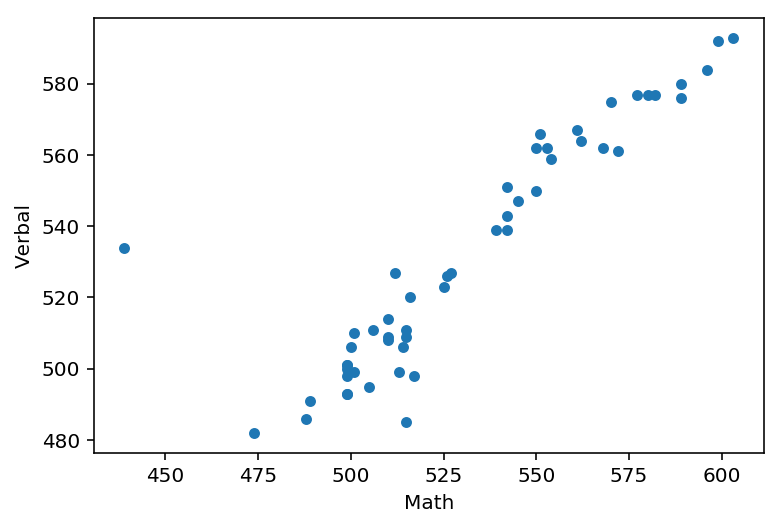

In [58]:
sat_df.plot.scatter(x='Math',y='Verbal')

In [55]:
# 1. 
sat_df['Rate'];

2. The generally accepted rule for calculating outliers is the Q1/Q3 +/- 1.5IQR rule. This states that any variable in the sample that is below Q1 - 1.5IQR or above Q3 + 1.5IQR is an outlier. To find out whether there are any outliers in the data set, I shall calculate below:

In [56]:
Q1 = stats.scoreatpercentile(sat_df['Rate'], 25.0)
Q3 = stats.scoreatpercentile(sat_df['Rate'], 75.0)

IQR = Q3 - Q1

#To check if there are any variables outside the Q1/Q3 +/- 1.5IQR bounds I shall iterate through all values
#in sat_df['Rate'] and check if they are out of the bounds.

for num in sat_df['Rate']:
    if num < Q1 - 1.5*IQR:
        print(num, 'is a lower outliter.')
    elif num > Q3 + 1.5*IQR:
        print(num, 'is an upper outlier.')

Iterating through the variables in sat_df['Rate'] found no variables that were outliers.

3. The for loop returned no outliers variables so none can be printed. 

4. There are no outliers to remove from the data set. 

5. The mean, median and standard deviation are all the same as no outliers were removed from the dataset.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


1. The pearson correlation measures the degree of a linear relationship between two variables and measures how they change together. The spearman rank correlation measures the same thing as the pearson correlation, however, it can be applied to ordinal variables, and is good for correlating the order of one variable, to another variable. The spearman rank correlation can be more helpeful when (using a scatter plot as a visual guide) there does exist a relationship between two variables but it cannot be regressed to a line of best fit (i.e. it is not completely linear and may curve, but still indicates a relationship between the two variables).


2. The spearmank rank correlation process is as follows:

First we need to rank the variables for both 'Verbal' and 'Math', with the highest rank (#1) going to the largest value. The process seems easy at first, but becomes a bit complicated when you have repeated values. When you have repeated values, you need to take their normal rank as if they weren't repeated and take the mean of them. For example, if you have repeated values that take up the 2nd, 3rd and 4th, then the ranking would be 3rd (9/3 = 3). The value after that isn't repeated would be 5th, so the rankings would go 1st, 3rd, 3rd, 3rd, 5th.

I will go through the process below, but it's quite long and messy (and I'm sure there is a more elegant way of doing this, but this is the way it worked for me). 

First I'm ranking the 'Verbal' column by just doing a simple sort, resetting the index so the highest value is ranked 1. 

In [57]:
verb_rank = pd.DataFrame(sat_df['Verbal']).sort_values(by='Verbal',ascending=False).reset_index(drop=True).reset_index()
verb_rank['index'] = verb_rank['index'] + 1
verb_rank.rename(columns={'index':'Rank',0:'Verbal'},inplace=True)
verb_rank

,Rank,Verbal
0,1,593
1,2,592
2,3,584
3,4,580
4,5,577
5,6,577
6,7,577
7,8,576
8,9,575
9,10,567


Then I'm doing the same thing, but only for unique (non-repeating) values, and ranking them.

In [58]:
verb_unq = pd.DataFrame(sat_df['Verbal'].unique()).sort_values(by=0,ascending=False).reset_index(drop=True).reset_index()
verb_unq['index'] = verb_unq['index'] + 1
verb_unq.rename(columns={'index':'Rank',0:'Verbal'},inplace=True)
verb_unq

,Rank,Verbal
0,1,593
1,2,592
2,3,584
3,4,580
4,5,577
5,6,576
6,7,575
7,8,567
8,9,566
9,10,564


Now I'm updating the unique ranking dataframe, by going through the original ranking dataframe, and taking the mean of all the rankings. By using a boolean filter, it will return a subset of particular values, and taking the mean of such. We do this for every value, because taking the mean of 1 value will just give you the original value, but if there are repeated values it will give you the mean of the 3 rankings and reassign them to the unique ranking dataframe. Now giving you the correct ranks for each value by taking the mean.

In [59]:
for num in verb_unq.index:
    for num2 in verb_rank.index:
        if verb_unq.loc[num][1] == verb_rank.loc[num2][1]:
            verb_unq.loc[num][0] = np.mean(verb_rank[verb_rank['Verbal'] == verb_rank.loc[num2][1]]['Rank'])

verb_unq

,Rank,Verbal
0,1,593
1,2,592
2,3,584
3,4,580
4,6,577
5,8,576
6,9,575
7,10,567
8,11,566
9,12,564


This is a bit of a long and inefficient process, but now I'm doing the same thing but just applying the mean ranks back to the non-unique Verbal dataframe. Now I have a dataframe of all the Verbal values which are correctly ranked to account for repeating values.

In [60]:
for x in verb_rank.index:
    for y in verb_unq.index:
        if verb_rank.loc[x][1] == verb_unq.loc[y][1]:
            verb_rank.loc[x][0] = verb_unq.loc[y][0]
verb_rank

,Rank,Verbal
0,1,593
1,2,592
2,3,584
3,4,580
4,6,577
5,6,577
6,6,577
7,8,576
8,9,575
9,10,567


Here I'm doing the same thing but with the Math values.

In [61]:
math_rank = pd.DataFrame(sat_df['Math']).sort_values(by='Math',ascending=False).reset_index(drop=True).reset_index()
math_rank['index'] = math_rank['index'] + 1
math_rank.rename(columns={'index':'Rank',0:'Math'},inplace=True)
math_rank

,Rank,Math
0,1,603
1,2,599
2,3,596
3,4,589
4,5,589
5,6,582
6,7,580
7,8,577
8,9,572
9,10,570


In [62]:
math_unq = pd.DataFrame(sat_df['Math'].unique()).sort_values(by=0,ascending=False).reset_index(drop=True).reset_index()
math_unq['index'] = math_unq['index'] + 1
math_unq.rename(columns={'index':'Rank',0:'Math'},inplace=True)

for num in math_unq.index:
    for num2 in math_rank.index:
        if math_unq.loc[num][1] == math_rank.loc[num2][1]:
            math_unq.loc[num][0] = np.mean(math_rank[math_rank['Math'] == math_rank.loc[num2][1]]['Rank'])

math_unq

,Rank,Math
0,1,603
1,2,599
2,3,596
3,4,589
4,6,582
5,7,580
6,8,577
7,9,572
8,10,570
9,11,568


In [63]:
for x in math_rank.index:
    for y in math_unq.index:
        if math_rank.loc[x][1] == math_unq.loc[y][1]:
            math_rank.loc[x][0] = math_unq.loc[y][0]
math_rank

,Rank,Math
0,1,603
1,2,599
2,3,596
3,4,589
4,4,589
5,6,582
6,7,580
7,8,577
8,9,572
9,10,570


Now that we have our proper rankings for eaach variable, I will create a new dataframe with the Verbal and Math ranks in their original order, and create two new columns for the ranking of each.

In [64]:
math_verb_comp = sat_df[['Verbal','Math']].copy()
math_verb_comp['Verbal_Rank'] = ''
math_verb_comp['Math_Rank'] = ''
math_verb_comp

,Verbal,Math,Verbal_Rank,Math_Rank
0,509,510,,
1,499,513,,
2,511,515,,
3,495,505,,
4,520,516,,
5,501,499,,
6,500,499,,
7,511,506,,
8,506,500,,
9,510,501,,


In [65]:
for a in math_verb_comp.index:
    for b in verb_rank.index:
        if math_verb_comp.loc[a,'Verbal'] == verb_rank.loc[b,'Verbal']:
            math_verb_comp.loc[a,'Verbal_Rank'] = verb_rank.loc[b,'Rank']

math_verb_comp

,Verbal,Math,Verbal_Rank,Math_Rank
0,509,510,34,
1,499,513,42,
2,511,515,31,
3,495,505,46,
4,520,516,29,
5,501,499,39,
6,500,499,41,
7,511,506,31,
8,506,500,37,
9,510,501,33,


Now I've just simply compared this dataframe to the other dataframes and assigned the rank corresponding to the Verbal/Math value.

In [66]:
for a in math_verb_comp.index:
    for b in math_rank.index:
        if math_verb_comp.loc[a,'Math'] == math_rank.loc[b,'Math']:
            math_verb_comp.loc[a,'Math_Rank'] = verb_rank.loc[b,'Rank']

math_verb_comp

,Verbal,Math,Verbal_Rank,Math_Rank
0,509,510,34,37
1,499,513,42,33
2,511,515,31,31
3,495,505,46,39
4,520,516,29,28
5,501,499,39,47
6,500,499,41,47
7,511,506,31,37
8,506,500,37,42
9,510,501,33,41


Now that this is done, the final process of the spearman correlation, is to find the difference of the rankings, and then square the difference. As you can see, the 'difference' and 'd-squared' columns do this.

In [67]:
math_verb_comp['difference'] = math_verb_comp['Verbal_Rank'] - math_verb_comp['Math_Rank']
math_verb_comp['d-squared'] = math_verb_comp['difference'].apply(lambda x : x**2)
math_verb_comp

,Verbal,Math,Verbal_Rank,Math_Rank,difference,d-squared
0,509,510,34,37,-3,9
1,499,513,42,33,9,81
2,511,515,31,31,0,0
3,495,505,46,39,7,49
4,520,516,29,28,1,1
5,501,499,39,47,-8,64
6,500,499,41,47,-6,36
7,511,506,31,37,-6,36
8,506,500,37,42,-5,25
9,510,501,33,41,-8,64


Now that this is done, we simply sum the difference of the squares and plug it into the formula below:

### $${r}_{s} = 1 - \frac{6\sum{D^2}}{n(n^2 - 1)}$$

- Where r is the spearman rank correlation
- D^2 is the sum of the squares of the differences
- and n is the number of samples in the column

Now we simply plug it into the formula as shown below:

In [68]:
#Now that we have all our data, we can plug them in to the above formula to get the final rank correlation 'r'
sum_d2 = math_verb_comp['d-squared'].sum()

n = len(math_verb_comp['d-squared'])

r = 1 - ((6*(sum_d2)) / (n*(n**2 -1))) 
print('The spearman rank correlation is {0:.3f}'.format(r))

The spearman rank correlation is 0.904


In [69]:
#Pearson correlation for comparison
pear = stats.pearsonr(sat_df['Verbal'],sat_df['Math'])[0]
print('The pearson correlation is {0:.3f}'.format(pear))

The pearson correlation is 0.900


And voila! You can see now that we have the final spearman rank correlation and the pearson correlation. While there is a little difference in the final output, you can see how different the calculation method is.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

1. To convert all values into a percentile I will refer to the formula below:


#### $$Value = \frac{Percentile}{100}(n+1)$$

As we can see below, this formula will find the ranking of a particular value given a percentile. The value represents the rank of the dataset, so a value of 4 will indicate that the passed in percentile equates to the 4th value in the dataset.

#### $$Percentile = \frac{100 * Value}{n+1}$$

Rearranging this now gives us the percentile for a given rank. So using this formula I will write a function below, that takes in a rank and gives us the percentile.

In [70]:
def percentile_convert(x):
    return (100*x) / (len(sat_df['Rate']) + 1)

Now that we have the function, we need to rank the values in the rate dataset. This follow the exact same process as I did above for the spearman ranking correlation, except in reverse, with the highest rank going to the smallest value.

In [71]:
rate_rank = sat_df[['Rate','State']].sort_values(by='Rate').reset_index(drop=True).copy()
rate_rank.reset_index(inplace=True)
rate_rank['index'] = rate_rank['index'] + 1
rate_rank.rename(columns={'index':'Rank'},inplace=True)
rate_rank

,Rank,Rate,State
0,1,4,ND
1,2,4,SD
2,3,4,MS
3,4,5,IA
4,5,5,UT
5,6,6,AR
6,7,6,WI
7,8,7,LA
8,9,8,MO
9,10,8,OK


In [72]:
rate_unq = pd.DataFrame(sat_df['Rate'].unique()).sort_values(by=0).reset_index(drop=True).reset_index()
rate_unq['index'] = rate_unq['index'] + 1
rate_unq.rename(columns={'index':'Rank',0:'Rate'},inplace=True)
rate_unq

,Rank,Rate
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8
5,6,9
6,7,11
7,8,12
8,9,13
9,10,17


In [73]:
for num in rate_unq.index:
    for num2 in rate_rank.index:
        if rate_unq.loc[num][1] == rate_rank.loc[num2][1]:
            rate_unq.loc[num][0] = np.mean(rate_rank[rate_rank['Rate'] == rate_rank.loc[num2][1]]['Rank'])

rate_unq

,Rank,Rate
0,2,4
1,4,5
2,6,6
3,8,7
4,10,8
5,13,9
6,15,11
7,17,12
8,19,13
9,21,17


In [74]:
for x in rate_rank.index:
    for y in rate_unq.index:
        if rate_rank.loc[x,'Rate'] == rate_unq.loc[y,'Rate']:
            rate_rank.loc[x,'Rank'] = rate_unq.loc[y,'Rank']
rate_rank

,Rank,Rate,State
0,2,4,ND
1,2,4,SD
2,2,4,MS
3,4,5,IA
4,4,5,UT
5,6,6,AR
6,6,6,WI
7,8,7,LA
8,10,8,MO
9,10,8,OK


In [75]:
rate_comp = sat_df[['State','Rate']].copy()
rate_comp['rate_rank'] = ''
rate_comp

,State,Rate,rate_rank
0,CT,82,
1,NJ,81,
2,MA,79,
3,NY,77,
4,NH,72,
5,RI,71,
6,PA,71,
7,VT,69,
8,ME,69,
9,VA,68,


In [76]:
for a in rate_comp.index:
    for b in rate_rank.index:
        if rate_comp.loc[a,'Rate'] == rate_rank.loc[b,'Rate']:
            rate_comp.loc[a,'rate_rank'] = rate_rank.loc[b,'Rank']

rate_comp

,State,Rate,rate_rank
0,CT,82,52
1,NJ,81,51
2,MA,79,50
3,NY,77,49
4,NH,72,48
5,RI,71,46
6,PA,71,46
7,VT,69,44
8,ME,69,44
9,VA,68,43


With the rankings applied, now all we need to do is apply the function we applied above to every ranking.

In [77]:
rate_comp['percentile'] = rate_comp['rate_rank'].apply(percentile_convert)
rate_comp

,State,Rate,rate_rank,percentile
0,CT,82,52,98.113208
1,NJ,81,51,96.226415
2,MA,79,50,94.339623
3,NY,77,49,92.452830
4,NH,72,48,90.566038
5,RI,71,46,86.792453
6,PA,71,46,86.792453
7,VT,69,44,83.018868
8,ME,69,44,83.018868
9,VA,68,43,81.132075


Now we have a dataframe with the percentiles for every state, voila!

2. California's percentile is calculated below:

In [78]:
ca_percentile = rate_comp[rate_comp['State'] == 'CA'].loc[23,'percentile']
print('California\'s percentile is {0:.2f}'.format(ca_percentile))

California's percentile is 54.72


3. Calculating the spearman ranking and percentile follows the exact same process for the first few steps. With finding out the spearman ranking you need to rank all the values in the dataset with the number 1 ranking going to the highest value (percentile scoring is a bit different, you need to assign the number 1 rank to the smallest value). The ranking of values is the common step in calculating percentiles and spearman correlations.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

1. Since outliers can be identified by whether the value is greater than Q3 + 1.5 x IQR or less than Q1 - 1.5 x IQR, percentiles are a good indicator of whether or not an outlier exists in the dataset. By finding out the percentiles for every value in the dataset, we can find out whether there are many values on a certain percentile, which can give us an indication of whether there are any outliers.

2. 

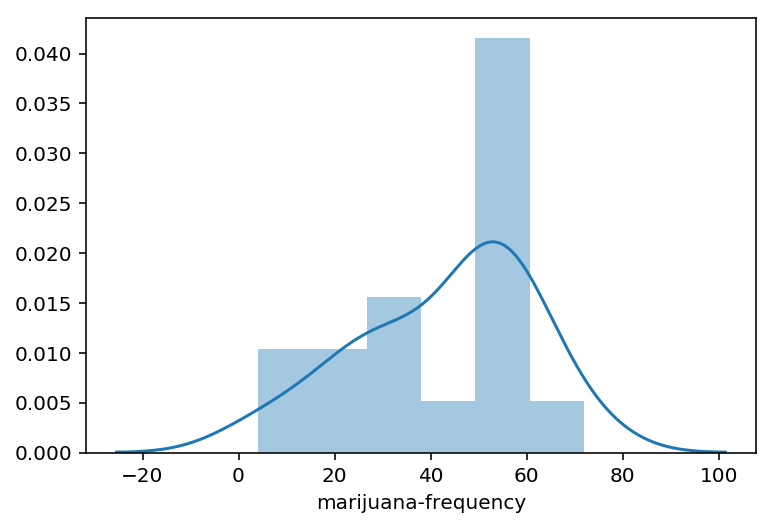

In [79]:
sns.distplot(drug_df['marijuana-frequency'],bins=6)

3. Doing the same thing as I did for 9.2, ranking the variables and then percentile scoring them, and finally plotting the percentile scores.

In [80]:
weed_rank = drug_df[['marijuana-frequency']].sort_values(by='marijuana-frequency').reset_index(drop=True).copy()
weed_rank.reset_index(inplace=True)
weed_rank['index'] = weed_rank['index'] + 1
weed_rank.rename(columns={'index':'Rank'},inplace=True)
weed_rank

,Rank,marijuana-frequency
0,1,4.0
1,2,15.0
2,3,24.0
3,4,25.0
4,5,30.0
5,6,36.0
6,7,36.0
7,8,48.0
8,9,52.0
9,10,52.0


In [81]:
weed_unq = pd.DataFrame(drug_df['marijuana-frequency'].unique()).sort_values(by=0).reset_index(drop=True).reset_index()
weed_unq['index'] = weed_unq['index'] + 1
weed_unq.rename(columns={'index':'Rank',0:'marijuana-frequency'},inplace=True)
weed_unq

,Rank,marijuana-frequency
0,1,4.0
1,2,15.0
2,3,24.0
3,4,25.0
4,5,30.0
5,6,36.0
6,7,48.0
7,8,52.0
8,9,60.0
9,10,72.0


In [82]:
for num in weed_unq.index:
    for num2 in weed_rank.index:
        if weed_unq.loc[num,'marijuana-frequency'] == weed_rank.loc[num2,'marijuana-frequency']:
            weed_unq.loc[num,'Rank'] = np.mean(weed_rank[weed_rank['marijuana-frequency'] == weed_rank.loc[num2][1]]['Rank'])

weed_unq

,Rank,marijuana-frequency
0,1.0,4.0
1,2.0,15.0
2,3.0,24.0
3,4.0,25.0
4,5.0,30.0
5,6.5,36.0
6,8.0,48.0
7,11.0,52.0
8,15.0,60.0
9,17.0,72.0


In [83]:
for x in weed_rank.index:
    for y in weed_unq.index:
        if weed_rank.loc[x,'marijuana-frequency'] == weed_unq.loc[y,'marijuana-frequency']:
            weed_rank.loc[x,'Rank'] = weed_unq.loc[y,'Rank']
weed_rank

,Rank,marijuana-frequency
0,1.0,4.0
1,2.0,15.0
2,3.0,24.0
3,4.0,25.0
4,5.0,30.0
5,6.5,36.0
6,6.5,36.0
7,8.0,48.0
8,11.0,52.0
9,11.0,52.0


In [84]:
weed_comp = drug_df[['age','marijuana-frequency']].copy()
weed_comp['weed_rank'] = ''
weed_comp

,age,marijuana-frequency,weed_rank
0,12,4.0,
1,13,15.0,
2,14,24.0,
3,15,25.0,
4,16,30.0,
5,17,36.0,
6,18,52.0,
7,19,60.0,
8,20,60.0,
9,21,52.0,


In [85]:
for a in weed_comp.index:
    for b in weed_rank.index:
        if weed_comp.loc[a,'marijuana-frequency'] == weed_rank.loc[b,'marijuana-frequency']:
            weed_comp.loc[a,'weed_rank'] = weed_rank.loc[b,'Rank']

weed_comp

,age,marijuana-frequency,weed_rank
0,12,4.0,1
1,13,15.0,2
2,14,24.0,3
3,15,25.0,4
4,16,30.0,5
5,17,36.0,6.5
6,18,52.0,11
7,19,60.0,15
8,20,60.0,15
9,21,52.0,11


In [86]:
def percentile_convert2(x):
    return (100*x) / (len(drug_df['marijuana-frequency']) + 1)

In [87]:
weed_comp['percentile'] = weed_comp['weed_rank'].apply(percentile_convert2)
weed_comp

,age,marijuana-frequency,weed_rank,percentile
0,12,4.0,1,5.555556
1,13,15.0,2,11.111111
2,14,24.0,3,16.666667
3,15,25.0,4,22.222222
4,16,30.0,5,27.777778
5,17,36.0,6.5,36.111111
6,18,52.0,11,61.111111
7,19,60.0,15,83.333333
8,20,60.0,15,83.333333
9,21,52.0,11,61.111111


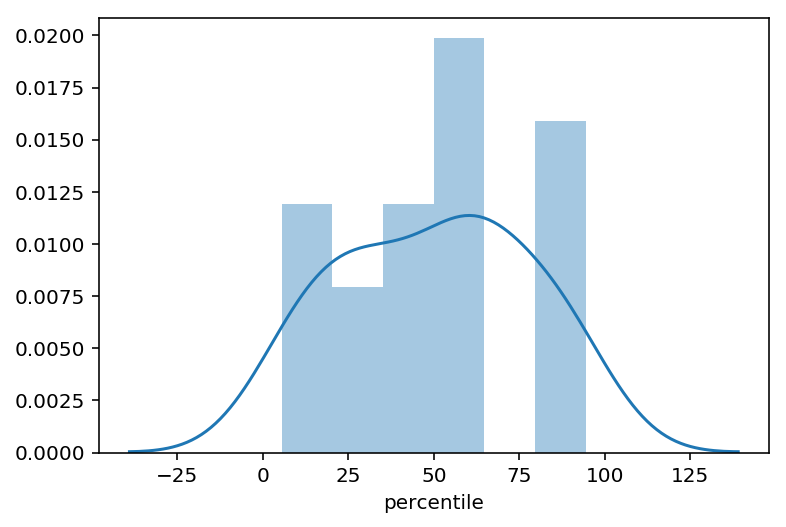

In [88]:
sns.distplot(weed_comp['percentile'],bins=6)

4. Plotting percentiles compared to the raw data, we can see that the plotting of the percentiles follows a more normal distribution than the values. It also features a flatter curve.